In [1]:
import requests
import re
import scrapy
import pandas as pd
import pymongo
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 100)

## Scraping

Various URLs from Earther with different formatting - test cases for the Earther scraper.


In [282]:
url = 'http://earther.gizmodo.com/exxonmobil-wishes-australia-a-happy-new-year-as-country-1840758432'
url = 'https://earther.gizmodo.com/theres-several-orders-of-magnitude-more-plastic-in-rive-1840538231'
url = 'https://deadspin.com/how-did-no-one-notice-this-inspirational-hiker-on-the-p-1818647235'
url = 'https://jalopnik.com/its-time-to-let-go-of-commuter-culture-1840630621'
url = 'https://earther.gizmodo.com/climate-change-stole-the-show-at-the-golden-globes-1840830510'
response = requests.get(url)
scrap = scrapy.http.HtmlResponse(url=url, 
                                 request=scrapy.http.Request(url), body=response.text, encoding='utf-8')

The Earther webcrawler added 3015 articles to the MongoDB (articles collection in items).

In [284]:
url = 'https://www.dailykos.com/news/Climate'
response = requests.get(url)
scrap = scrapy.http.HtmlResponse(url=url, 
                                 request=scrapy.http.Request(url), body=response.text, encoding='utf-8')

In [300]:
scrap.css(".nav-wrapper a::attr(href)").get()

'/part/story/table/by_tag?tag_id=35567&page=1'

## Load data from Mongo

In [5]:
myclient = pymongo.MongoClient("mongodb://127.0.0.1:27017/")
mydb = myclient['items']

In [6]:
mycollection = mydb['articles']

In [7]:
df = pd.DataFrame(list(mycollection.find({})))
df.created_at = pd.to_datetime(df.created_at, infer_datetime_format=True)
df.head()

,_id,url,title,twitter_url,image,keywords,description,num_like,num_reply,author,author_link,created_at,body_text,body_links
0,5e14bee3f106fd495904e5c5,https://earther.gizmodo.com/the-worlds-largest...,The World's Largest Floating Wind Farm Is Here,https://earther.gizmodo.com/the-worlds-largest...,https://i.kinja-img.com/gawker-media/image/upl...,"[Portugal, Earther, Wind Energy, Wind for the ...","This is the second day of the new decade, and ...",13000,34,Yessenia Funes,https://kinja.com/yessfun,2020-01-02 17:00:00-05:00,"This is the second day of the new decade, and ...",[http://www.principlepowerinc.com/en/news-pres...
1,5e14bee3f106fd495904e5c6,https://earther.gizmodo.com/trumps-tremendous-...,Trump's 'Tremendous' Superfund Work Includes N...,https://earther.gizmodo.com/trumps-tremendous-...,https://i.kinja-img.com/gawker-media/image/upl...,"[EPA, Donald Trump, Earther, Toxic Legacy, Env...",The Environmental Protection Agency under Dona...,9200,16,Yessenia Funes,https://kinja.com/yessfun,2020-01-03 15:30:00-05:00,The Environmental Protection Agency under Dona...,[https://earther.gizmodo.com/the-epas-superfun...
2,5e14bee3f106fd495904e5c7,https://lifehacker.com/how-to-help-those-affec...,How to Help Those Affected By the Australian W...,https://lifehacker.com/how-to-help-those-affec...,https://i.kinja-img.com/gawker-media/image/upl...,"[Lifehacker, AUSTRALIA, call for help, Fire]","As of Thursday morning, ongoing bushfires have...",15100,12,Josh Ocampo,https://kinja.com/joshocampo,2020-01-02 14:45:00-05:00,"As of Thursday morning, ongoing bushfires have...",[https://www.theguardian.com/australia-news/li...
3,5e14bee3f106fd495904e5c8,https://earther.gizmodo.com/smoke-from-austral...,"Smoke From Australia’s Horrific Wildfires, as ...",https://earther.gizmodo.com/smoke-from-austral...,https://i.kinja-img.com/gawker-media/image/upl...,"[fires, global warming, Satellite Images, heat...",Significant portions of Australia’s southeast ...,38700,15,George Dvorsky,https://kinja.com/georgedvorsky,2020-01-03 10:10:00-05:00,Significant portions of Australia’s southeast ...,[https://earthobservatory.nasa.gov/images/1460...
4,5e14bee3f106fd495904e5c9,https://earther.gizmodo.com/earthquake-shows-h...,Earthquake Shows Puerto Rico's Electric Grid I...,https://earther.gizmodo.com/earthquake-shows-h...,https://i.kinja-img.com/gawker-media/image/upl...,"[Puerto Rico, Hurricane Maria, Earther, Energy...",Puerto Rico just can’t seem to catch a break. ...,8100,6,Yessenia Funes,https://kinja.com/yessfun,2020-01-06 15:55:00-05:00,Puerto Rico just can’t seem to catch a break. ...,[http://ds.iris.edu/seismon/quakes_today_in_N_...


In [8]:
keywords = df.keywords.sum()

In [366]:
keyword_count = pd.Series(keywords).str.lower().str.replace(" ","").value_counts()
keyword_count[keyword_count > 2]

earther                    2536
climatechange               668
science                     527
gizmodo                     294
conservation                268
                           ... 
lymedisease                   3
nuclearwaste                  3
fiatchrysler                  3
hurricanemariacontinues       3
explainers                    3
Length: 856, dtype: int64

In [340]:

pd.Series(keywords).str.lower().str.replace(" ","").value_counts().head(100)

earther                              2536
climatechange                         668
science                               527
gizmodo                               294
conservation                          268
environmentaljustice                  237
weather                               173
climate                               160
wildfires                             128
california                            117
epa                                   105
environment                           103
wildlife                              103
trumpadministration                    96
weatherishappening                     77
ecology                                77
antarctica                             76
naturaldisasters                       75
airpollution                           73
globalwarming                          72
animals                                72
hurricanemaria                         71
puertorico                             69
pollution                         

In [348]:
df.head()

,_id,url,title,twitter_url,image,keywords,description,num_like,num_reply,author,author_link,created_at,body_text,body_links,tokens
0,5e14bee3f106fd495904e5c5,https://earther.gizmodo.com/the-worlds-largest...,The World's Largest Floating Wind Farm Is Here,https://earther.gizmodo.com/the-worlds-largest...,https://i.kinja-img.com/gawker-media/image/upl...,"[Portugal, Earther, Wind Energy, Wind for the ...","This is the second day of the new decade, and ...",13000,34,Yessenia Funes,https://kinja.com/yessfun,2020-01-02T17:00:00-05:00,"This is the second day of the new decade, and ...",[http://www.principlepowerinc.com/en/news-pres...,"[second, day, new, decade, world, largest, flo..."
1,5e14bee3f106fd495904e5c6,https://earther.gizmodo.com/trumps-tremendous-...,Trump's 'Tremendous' Superfund Work Includes N...,https://earther.gizmodo.com/trumps-tremendous-...,https://i.kinja-img.com/gawker-media/image/upl...,"[EPA, Donald Trump, Earther, Toxic Legacy, Env...",The Environmental Protection Agency under Dona...,9200,16,Yessenia Funes,https://kinja.com/yessfun,2020-01-03T15:30:00-05:00,The Environmental Protection Agency under Dona...,[https://earther.gizmodo.com/the-epas-superfun...,"[environmental, protection, agency, donald, tr..."
2,5e14bee3f106fd495904e5c7,https://lifehacker.com/how-to-help-those-affec...,How to Help Those Affected By the Australian W...,https://lifehacker.com/how-to-help-those-affec...,https://i.kinja-img.com/gawker-media/image/upl...,"[Lifehacker, AUSTRALIA, call for help, Fire]","As of Thursday morning, ongoing bushfires have...",15100,12,Josh Ocampo,https://kinja.com/joshocampo,2020-01-02T14:45:00-05:00,"As of Thursday morning, ongoing bushfires have...",[https://www.theguardian.com/australia-news/li...,"[thursday, morning, ongoing, bushfires, contin..."
3,5e14bee3f106fd495904e5c8,https://earther.gizmodo.com/smoke-from-austral...,"Smoke From Australia’s Horrific Wildfires, as ...",https://earther.gizmodo.com/smoke-from-austral...,https://i.kinja-img.com/gawker-media/image/upl...,"[fires, global warming, Satellite Images, heat...",Significant portions of Australia’s southeast ...,38700,15,George Dvorsky,https://kinja.com/georgedvorsky,2020-01-03T10:10:00-05:00,Significant portions of Australia’s southeast ...,[https://earthobservatory.nasa.gov/images/1460...,"[significant, portions, australia, southeast, ..."
4,5e14bee3f106fd495904e5c9,https://earther.gizmodo.com/earthquake-shows-h...,Earthquake Shows Puerto Rico's Electric Grid I...,https://earther.gizmodo.com/earthquake-shows-h...,https://i.kinja-img.com/gawker-media/image/upl...,"[Puerto Rico, Hurricane Maria, Earther, Energy...",Puerto Rico just can’t seem to catch a break. ...,8100,6,Yessenia Funes,https://kinja.com/yessfun,2020-01-06T15:55:00-05:00,Puerto Rico just can’t seem to catch a break. ...,[http://ds.iris.edu/seismon/quakes_today_in_N_...,"[puerto, rico, seem, catch, break, people, isl..."


In [357]:
total_vocab = set()
for article in df.tokens:
    total_vocab.update(article)
len(total_vocab)

63789

In [358]:
articles_concat = []
for article in df.tokens:
    articles_concat += article

In [359]:
articles_freqdist = FreqDist(articles_concat)

In [376]:
articles_freqdist.most_common(50)

[('climate', 8477),
 ('said', 5923),
 ('new', 5678),
 ('also', 5127),
 ('change', 4960),
 ('like', 4806),
 ('one', 4644),
 ('people', 4628),
 ('could', 4502),
 ('would', 3840),
 ('water', 3700),
 ('year', 3541),
 ('told', 3468),
 ('world', 3309),
 ('earther', 3115),
 ('even', 2993),
 ('time', 2872),
 ('years', 2870),
 ('last', 2676),
 ('according', 2633),
 ('still', 2546),
 ('ice', 2472),
 ('state', 2434),
 ('much', 2361),
 ('study', 2351),
 ('around', 2307),
 ('environmental', 2281),
 ('percent', 2244),
 ('first', 2222),
 ('may', 2176),
 ('species', 2170),
 ('energy', 2164),
 ('many', 2146),
 ('get', 2134),
 ('u.s.', 2133),
 ('carbon', 2133),
 ('way', 2126),
 ('national', 2045),
 ('research', 1962),
 ('scientists', 1959),
 ('make', 1891),
 ('sea', 1868),
 ('air', 1835),
 ('well', 1804),
 ('back', 1791),
 ('since', 1778),
 ('two', 1769),
 ('see', 1737),
 ('emissions', 1725),
 ('need', 1686)]

In [383]:
df.keywords.map(lambda lst : ' '.join([k.replace(' ','-') for k in lst]))

0       Portugal Earther Wind-Energy Wind-for-the-Win ...
1       EPA Donald-Trump Earther Toxic-Legacy Environm...
2                 Lifehacker AUSTRALIA call-for-help Fire
3       fires global-warming Satellite-Images heat-wav...
4       Puerto-Rico Hurricane-Maria Earther Energy Ear...
                              ...                        
3010                                              Earther
3011    Puerto-Rico El-Yunque hurricanes science disas...
3012                     Lifehacker Pets Environment Dogs
3013    polar science Earther art sound-of-climate-sil...
3014    whales science Earther conservation marine-bio...
Name: keywords, Length: 3015, dtype: object

## K-Means Clustering on keywords

First, we need to make a sparse array of keywords (1 column per keyword, 1 row per article).

In [10]:
key_df = pd.DataFrame(df.keywords.copy())

In [11]:
key_df

,keywords
0,"[Portugal, Earther, Wind Energy, Wind for the ..."
1,"[EPA, Donald Trump, Earther, Toxic Legacy, Env..."
2,"[Lifehacker, AUSTRALIA, call for help, Fire]"
3,"[fires, global warming, Satellite Images, heat..."
4,"[Puerto Rico, Hurricane Maria, Earther, Energy..."
...,...
3010,[Earther]
3011,"[Puerto Rico, El Yunque, hurricanes, science, ..."
3012,"[Lifehacker, Pets, Environment, Dogs]"
3013,"[polar, science, Earther, art, sound of climat..."


In [13]:
vect = CountVectorizer()

key_df = pd.DataFrame(df.keywords.copy())

X = vect.fit_transform(key_df.pop('keywords').map(lambda lst : ' '.join([k.replace(' ','_') for k in lst])))

for i, col in enumerate(vect.get_feature_names()):
    key_df[col] = pd.Series(X[:, i].toarray().ravel())


In [14]:
key_df.loc[1481][key_df.loc[1481] > 0]

anniversary             1
best_of_earther         1
best_of_gizmodo         1
earther                 1
earther_is_best_blog    1
Name: 1481, dtype: int64

In [15]:
df.loc[1481].keywords

['Earther',
 'anniversary',
 'best of gizmodo',
 'earther is best blog',
 'best of earther']

NOTE: We may want to drop all "Earther", "Gizmodo", "Jalopnik", etc. keywords.

Next, we perform k-means clustering!

In [16]:
k_means = KMeans(n_clusters = 10)
k_means.fit(key_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [17]:
k_means.predict(key_df)

array([8, 8, 0, ..., 0, 6, 5], dtype=int32)

In [18]:
df['cluster'] = k_means.predict(key_df)

In [22]:
pd.Series(df[df['cluster'] == 1].keywords.sum()).value_counts().head(40)

Earther                         227
Environmental Justice           195
environmental justice            33
Climate Change                   23
Flint Water Crisis               22
Hurricane Maria                  22
Puerto Rico                      20
EPA                              19
Lead                             18
Air Pollution                    16
Trump Administration             13
Bayou Bridge Pipeline            10
Keystone XL                       8
Health                            8
Goddamn Pollution                 8
Indigenous Rights                 8
Oil and Gas                       8
Hurricane Harvey                  7
Pollution                         7
Louisiana                         7
Standing Rock                     7
climate change                    6
Bears Ears National Monument      6
Art                               6
Dakota Access Pipeline            6
Oil Pipelines                     5
Environment                       5
Natural Gas                 

In [23]:
pd.Series(df[df['cluster'] == 0].keywords.sum()).value_counts().head(40)

Gizmodo                      70
Jalopnik                     43
Lifehacker                   41
climate change               27
Jezebel                      26
Climate Change               17
The Root                     17
environment                  16
Environment                  13
The Slot                     12
Deadspin                     12
donald trump                  9
car policy                    8
News                          8
animals                       8
recycling                     8
recycle                       7
technology                    7
EPA                           7
Flint water crisis            7
Vitals                        6
puerto rico                   5
Puerto Rico                   5
automaton                     5
epa                           5
environmental racism          5
natural disasters             5
Flint Michigan                5
Donald Trump                  5
Hurricane Maria               5
Flint water contamination     5
Technolo

In [45]:
pd.Series(df[df['cluster'] == 1].keywords.sum()).value_counts().head(20).index.to_list()

['Earther',
 'Environmental Justice',
 'environmental justice',
 'Climate Change',
 'Flint Water Crisis',
 'Hurricane Maria',
 'Puerto Rico',
 'EPA',
 'Lead',
 'Air Pollution',
 'Trump Administration',
 'Bayou Bridge Pipeline',
 'Keystone XL',
 'Health',
 'Goddamn Pollution',
 'Indigenous Rights',
 'Oil and Gas',
 'Hurricane Harvey',
 'Pollution',
 'Louisiana']

Excellent, we have generated meaningful categories.

In [66]:
pd.Series(df[df['cluster'] == i].keywords.sum()).value_counts().head(20).reset_index()[['index',0]].apply(lambda x : x.astype(str)).apply(" ".join, axis=1)

0                               Earther 73
1                             wildfires 51
2     wildfire season is year round now 41
3                            California 30
4                            california 22
5                             Wildfires 18
6                        climate change 17
7                  California wildfires 14
8                             camp fire 13
9                         Climate Change 8
10                               weather 6
11                                  PG&E 5
12                             Camp Fire 5
13        california can't catch a break 5
14                              paradise 4
15                          woolsey fire 4
16                       Extreme Weather 3
17                               climate 3
18                                 smoke 3
19                   paradise california 3
dtype: object

In [67]:
clusters = {}
for i in range(10):
    clusters[i] = pd.Series(df[df['cluster'] == i].keywords.sum()).value_counts().head(20).reset_index()[['index',0]].apply(lambda x : x.astype(str)).apply(" ".join, axis=1)
pd.DataFrame(clusters)

,0,1,2,3,4,5,6,7,8,9
0,Gizmodo 70,Earther 227,Earther 502,Earther 54,Gizmodo 16,Earther 219,Earther 259,Gizmodo 207,Earther 1201,Earther 73
1,Jalopnik 43,Environmental Justice 195,climate change 325,climate policy 32,science 11,conservation 173,science 110,science 166,weather is happening 46,wildfires 51
2,Lifehacker 41,environmental justice 33,Climate Change 174,2020 election 20,Volcanoes 8,Conservation 48,climate 95,Science 43,weather 41,wildfire season is year round now 41
3,climate change 27,Climate Change 23,Science 43,2020 Election 9,volcanoes 6,wildlife 48,Science 76,biology 28,Air Pollution 31,California 30
4,Jezebel 26,Flint Water Crisis 22,climate 40,green new deal 7,earth sciences 4,science 28,weather 44,Climate Change 22,hurricane season 29,california 22
5,Climate Change 17,Hurricane Maria 22,science 35,jay inslee 6,geology 4,animals 22,weather is happening 17,climate change 18,natural disasters 29,Wildfires 18
6,The Root 17,Puerto Rico 20,ice on thin ice 32,renewable energy 6,volcanic eruptions 3,ecology 20,wild weather 16,Conservation 17,EPA 27,climate change 17
7,environment 16,EPA 19,weather 30,trump administration 3,Mount kilauea 3,marine biology 12,hurricane season 14,Environment 17,they call it global warming for a reason 27,California wildfires 14
8,Environment 13,Lead 18,arctic 26,Trump Administration 3,Disasters 3,invasive species 12,climate change 12,geology 13,wildlife 26,camp fire 13
9,The Slot 12,Air Pollution 16,sea level rise 22,Elizabeth Warren 3,Seismology 3,climate change 10,ecology 11,birds 12,oceans 25,Climate Change 8


In [70]:
df.cluster.value_counts().sort_index()

0     248
1     228
2     502
3      54
4      16
5     220
6     260
7     210
8    1201
9      76
Name: cluster, dtype: int64

Note that the first category is of cross-posted articles. That's cool that they're being found but we should drop those keywords and re-cluster.

The other categories we've found: 
1. EJ / eco-activism
1. climate science
1. climate politics
1. volcanoes & earthquakes (tectonics)
1. conservation
1. science of extreme weather
1. biology
1. extreme weather / global warming is real / catchall
1. wildfires

Note that categories 6 and 8 seem very overlapping. Also the categories are of very different sizes, which isn't ideal.

Do we have the right clusters? Need to do the silhouette score/elbowing.
* make sure to build process that allows for new classes / different classes to be generated
* build the pipeline
* how do you scrape to just add new stuff? have a meta table that keeps track of the last run, stop once your date is before. If articles have sequential ids you could in theory use that

use rss feeds follow the link, grab ALL the text then use tfidf to grab only the interesting words

In [71]:
df.cluster.max()

9

# Use Modeler to do clustering

In [4]:
import importlib
import topic_modeler.modeling
importlib.reload(topic_modeler.modeling)
from topic_modeler.modeling import Modeler

In [5]:
modeler = Modeler()

In [138]:
modeler.articles

,_id,url,title,twitter_url,image,keywords,description,num_like,num_reply,author,author_link,created_at,body_text,body_links
0,5e14bee3f106fd495904e5c5,https://earther.gizmodo.com/the-worlds-largest...,The World's Largest Floating Wind Farm Is Here,https://earther.gizmodo.com/the-worlds-largest...,https://i.kinja-img.com/gawker-media/image/upl...,"[Portugal, Earther, Wind Energy, Wind for the ...","This is the second day of the new decade, and ...",13000,34,Yessenia Funes,https://kinja.com/yessfun,2020-01-02 17:00:00-05:00,"This is the second day of the new decade, and ...",[http://www.principlepowerinc.com/en/news-pres...
1,5e14bee3f106fd495904e5c6,https://earther.gizmodo.com/trumps-tremendous-...,Trump's 'Tremendous' Superfund Work Includes N...,https://earther.gizmodo.com/trumps-tremendous-...,https://i.kinja-img.com/gawker-media/image/upl...,"[EPA, Donald Trump, Earther, Toxic Legacy, Env...",The Environmental Protection Agency under Dona...,9200,16,Yessenia Funes,https://kinja.com/yessfun,2020-01-03 15:30:00-05:00,The Environmental Protection Agency under Dona...,[https://earther.gizmodo.com/the-epas-superfun...
2,5e14bee3f106fd495904e5c7,https://lifehacker.com/how-to-help-those-affec...,How to Help Those Affected By the Australian W...,https://lifehacker.com/how-to-help-those-affec...,https://i.kinja-img.com/gawker-media/image/upl...,"[Lifehacker, AUSTRALIA, call for help, Fire]","As of Thursday morning, ongoing bushfires have...",15100,12,Josh Ocampo,https://kinja.com/joshocampo,2020-01-02 14:45:00-05:00,"As of Thursday morning, ongoing bushfires have...",[https://www.theguardian.com/australia-news/li...
3,5e14bee3f106fd495904e5c8,https://earther.gizmodo.com/smoke-from-austral...,"Smoke From Australia’s Horrific Wildfires, as ...",https://earther.gizmodo.com/smoke-from-austral...,https://i.kinja-img.com/gawker-media/image/upl...,"[fires, global warming, Satellite Images, heat...",Significant portions of Australia’s southeast ...,38700,15,George Dvorsky,https://kinja.com/georgedvorsky,2020-01-03 10:10:00-05:00,Significant portions of Australia’s southeast ...,[https://earthobservatory.nasa.gov/images/1460...
4,5e14bee3f106fd495904e5c9,https://earther.gizmodo.com/earthquake-shows-h...,Earthquake Shows Puerto Rico's Electric Grid I...,https://earther.gizmodo.com/earthquake-shows-h...,https://i.kinja-img.com/gawker-media/image/upl...,"[Puerto Rico, Hurricane Maria, Earther, Energy...",Puerto Rico just can’t seem to catch a break. ...,8100,6,Yessenia Funes,https://kinja.com/yessfun,2020-01-06 15:55:00-05:00,Puerto Rico just can’t seem to catch a break. ...,[http://ds.iris.edu/seismon/quakes_today_in_N_...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3010,5e14bf64f106fd495904f187,https://earther.gizmodo.com/about-earther-1818...,About Earther,https://earther.gizmodo.com/about-earther-1818...,https://i.kinja-img.com/gawker-media/image/upl...,[Earther],"Thanks for stopping by Earther, a destination ...",5800,0,Earther Staff,NaN,2017-09-27 08:00:00-04:00,"Thanks for stopping by Earther, a destination ...",[https://gizmodo.com/gizmodo-media-groups-edit...
3011,5e14bf64f106fd495904f188,https://earther.gizmodo.com/americas-only-trop...,The Only Tropical Rainforest in the National F...,https://earther.gizmodo.com/americas-only-trop...,https://i.kinja-img.com/gawker-media/image/upl...,"[Puerto Rico, El Yunque, hurricanes, science, ...",A week after Hurricane Maria tore through the ...,24300,61,Maddie Stone,https://kinja.com/maddiestone,2017-09-27 15:00:00-04:00,A week after Hurricane Maria tore through the ...,[https://www.nytimes.com/2017/09/25/us/puerto-...
3012,5e14bf64f106fd495904f189,https://lifehacker.com/how-to-keep-your-dog-fr...,How to Keep Your Dog from Destroying the Envir...,https://lifehacker.com/how-to-keep-your-dog-fr...,https://i.kinja-img.com/gawker-media/image/upl...,"[Lifehacker, Pets, Environment, Dogs]","Dogs are humans’ best friends, immeasurable br...",20600,53,Tim Donnelly,https://kinja.com/timdo

In [153]:
modeler.gizmodo_stop_words

['earther',
 'earther_is_a_berg_blog_now',
 'paleofuture',
 'earther_is_a_scat_blog_now',
 'best_of_earther',
 'the_root',
 'sorry_but_earther_is_a_cats_blog_now',
 'lifehacker',
 'earther_is_a_real_estate_blog_now',
 'earther_is_a_beauty_blog_now',
 'earther_is_an_art_blog_now',
 'best_of_gizmodo',
 'deadspin',
 'earther_is_a_car_blog_now',
 'earther_is_a_poop_blog_now',
 'welcome_to_earther',
 'earther_is_a_food_blog_now',
 'the_muse',
 'earther_is_a_sports_blog_now',
 'the_takeout',
 'earther_is_a_royal_baby_blog_now',
 'the_slot',
 'earther_is_a_youth_interest_blog',
 'earther_is_an_earth_blog',
 'earther_is_best_blog',
 'jalopnik',
 'the_concourse',
 'jalopnik_investigates',
 'earther_is_a_crypto_blog_now',
 'flat_dot_earther_dot_com',
 'earther',
 'earther_is_a_gaming_blog_now',
 'earther_is_a_hog_blog_now',
 'gizmodo',
 'earther_goes_to_the_museum',
 'jezebel',
 'earther_is_a_gamer_blog_now']

In [157]:
modeler.vectorized_keywords

Keywords have not been vectorized. Run Modeler.vectorize_keywords().


In [184]:
modeler.vectorize_keywords()

,11,13,17,18_months_until_take_off,2010s,2011_japan_earthquake,2016_election,2017_hurricane_season,2017_in_review,2018,...,zero_hour,zero_waste,zone,zoo,zoo_knoxville,zoology,zoomers,zoos,zsolt_török,ʻōhiʻa
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3010,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3011,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3012,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3013,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [211]:
modeler.cluster_keywords(4)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [213]:
modeler.display_keyword_clusters(40)

,0,1,2,3
0,science 317,climate change 339,Environmental Justice 169,conservation 183
1,Science 160,Climate Change 179,weather 72,Conservation 65
2,climate change 68,climate 45,climate 71,wildlife 48
3,Climate Change 65,wildfires 33,weather is happening 62,science 39
4,climate 32,weather 31,EPA 50,animals 26
5,weather 30,ice on thin ice 28,wildfires 47,ecology 22
6,biology 28,arctic 23,Air Pollution 47,Environment 14
7,geology 23,Environmental Justice 23,Hurricane Maria 44,environment 12
8,ecology 21,climate policy 20,California 40,invasive species 12
9,global warming 19,sea level rise 19,hurricane season 40,marine biology 12


In [187]:
modeler.articles.cluster.value_counts()

1    1391
6     452
2     344
7     198
9     188
5     164
4     133
8      94
3      50
0       1
Name: cluster, dtype: int64

In [188]:
modeler.articles.query('cluster == 0')

,_id,url,title,twitter_url,image,keywords,description,num_like,num_reply,author,author_link,created_at,body_text,body_links,cluster
1764,5e14bf2ff106fd495904eca9,https://lifehacker.com/how-to-survive-extreme-...,How to Survive Extreme Heat In the Great Outdoors,https://lifehacker.com/how-to-survive-extreme-...,https://i.kinja-img.com/gawker-media/image/upl...,"[Wilderness, Summer, Lifehacker, Heat, Surviva...","There are a lot of intense dangers in nature, ...",30000,47,Patrick Allan,https://kinja.com/patrickallan,2018-07-05 16:00:00-04:00,"There are a lot of intense dangers in nature, ...","[https://www.youtube.com/watch?v=_zBZrPfqQYA, ...",0


In [224]:
modeler.vectorize_keywords()

,11,13,17,18_months_until_take_off,2010s,2011_japan_earthquake,2016_election,2017_hurricane_season,2017_in_review,2018,...,zero_hour,zero_waste,zone,zoo,zoo_knoxville,zoology,zoomers,zoos,zsolt_török,ʻōhiʻa
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3010,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3011,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3012,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3013,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [225]:
modeler.cluster_keywords(6)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

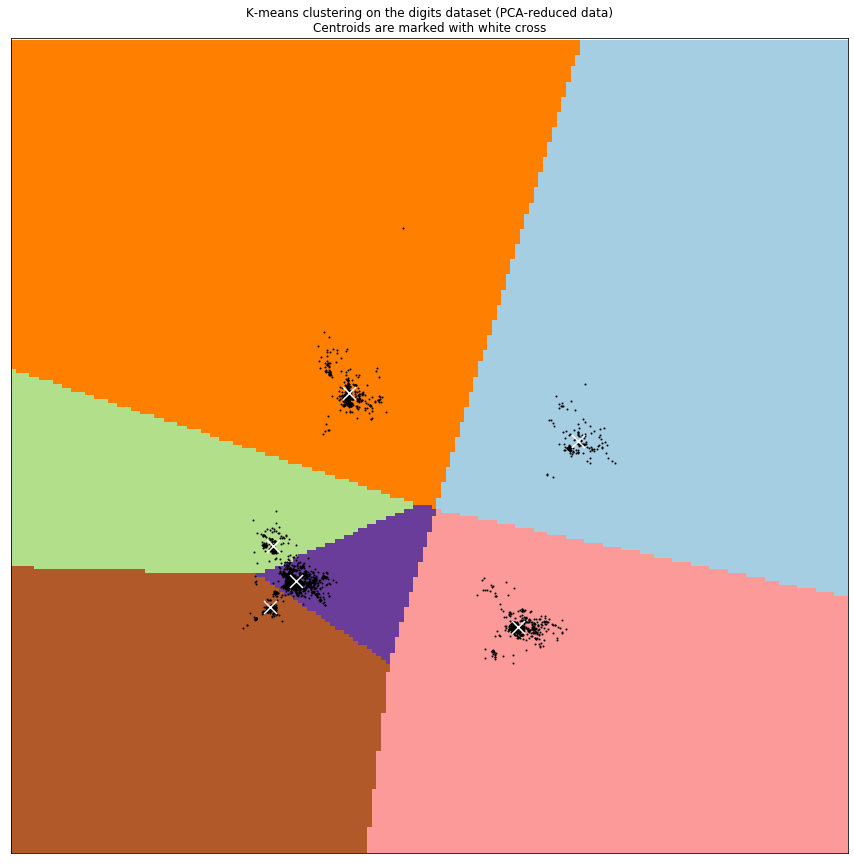

In [226]:
modeler.display_reduced_keyword_clusters()

For n_clusters = 18 The average silhouette_score is : 0.02731990829018572
For n_clusters = 19 The average silhouette_score is : 0.0331064589142711
For n_clusters = 20 The average silhouette_score is : 0.03378826554735443
For n_clusters = 21 The average silhouette_score is : 0.03608641305451806
For n_clusters = 22 The average silhouette_score is : 0.034080188327737765
For n_clusters = 23 The average silhouette_score is : 0.03547257940386737
For n_clusters = 24 The average silhouette_score is : 0.03528505310796431
For n_clusters = 25 The average silhouette_score is : 0.03321064569762207


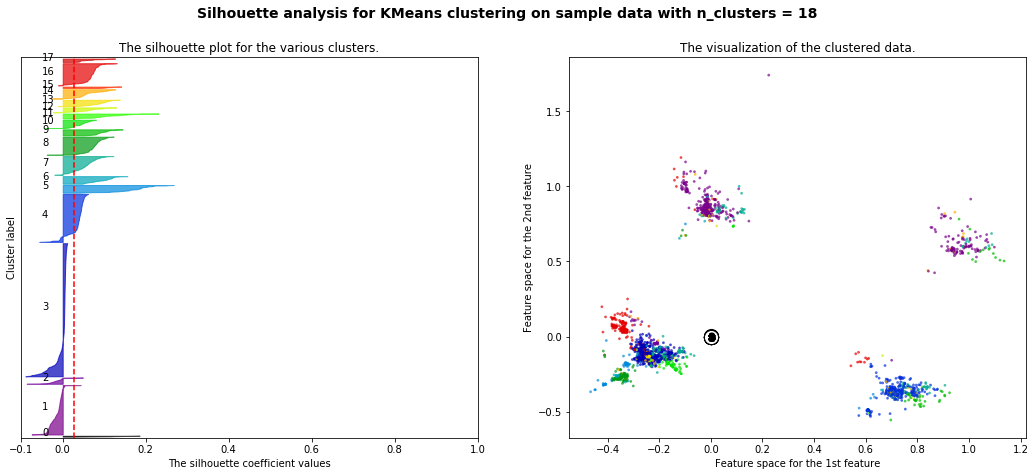

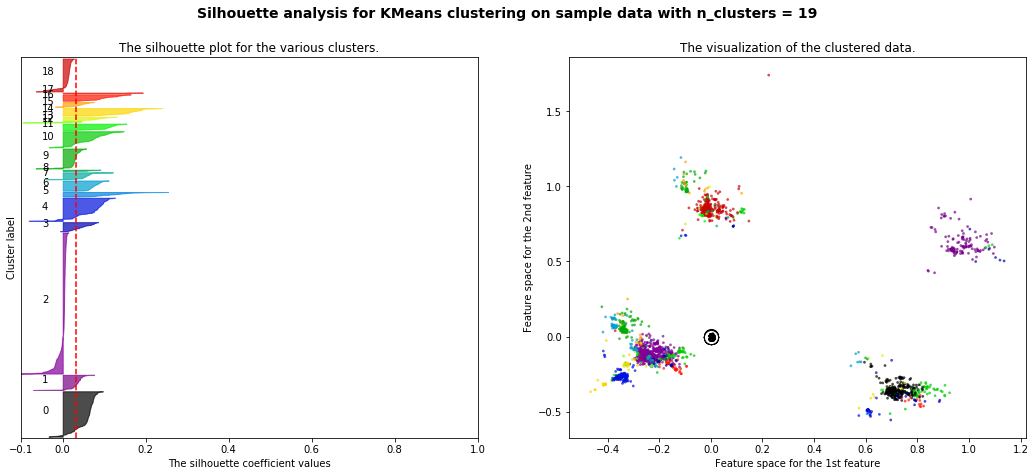

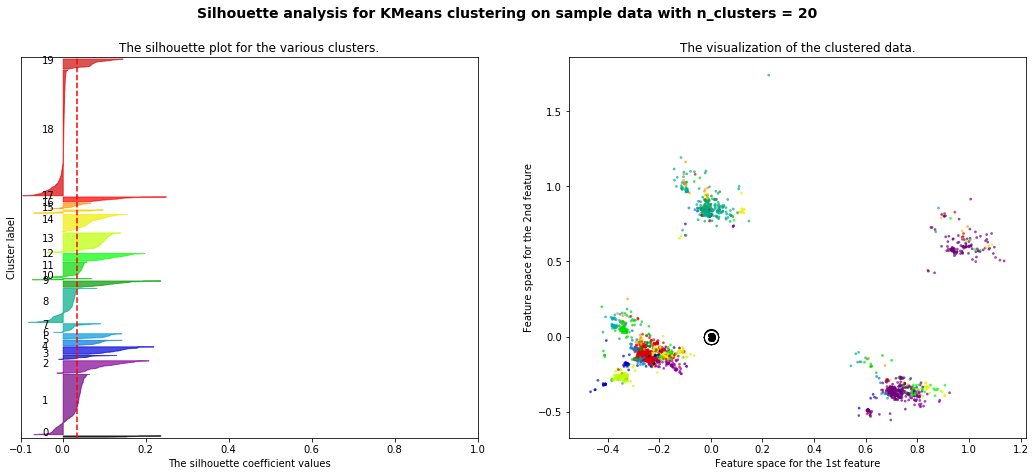

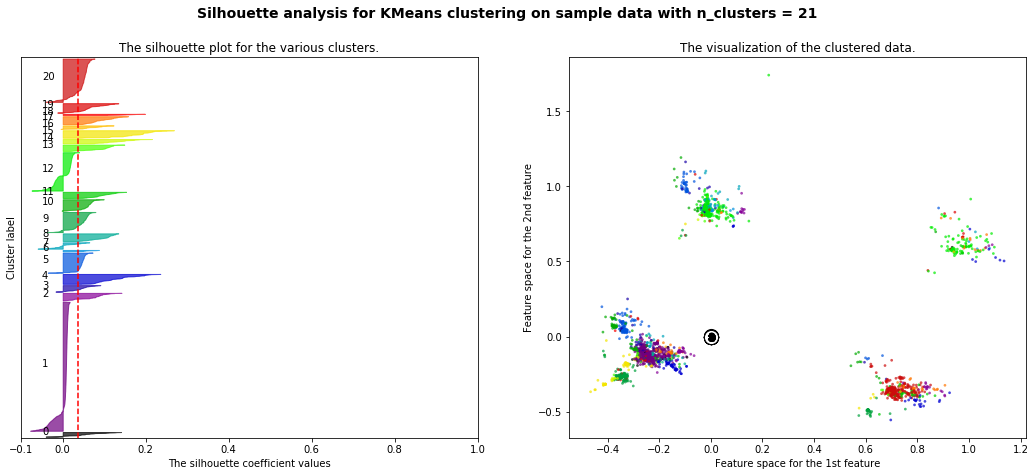

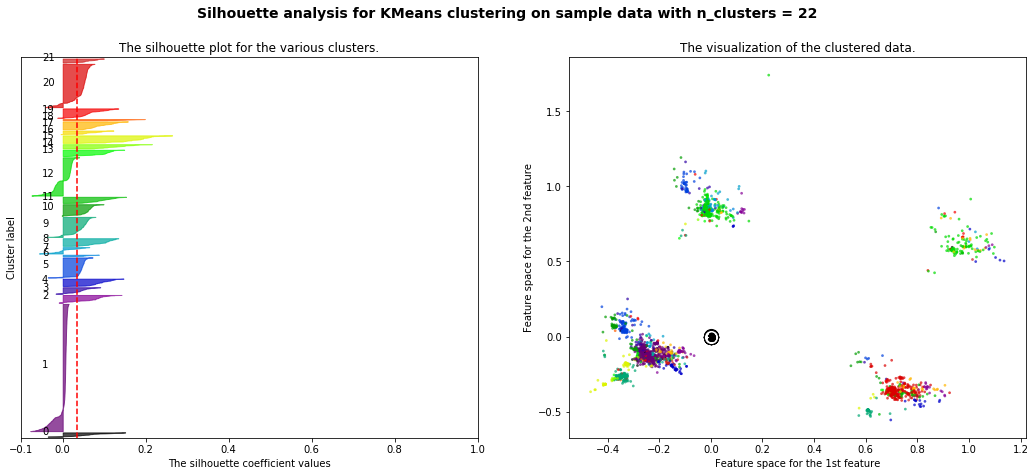

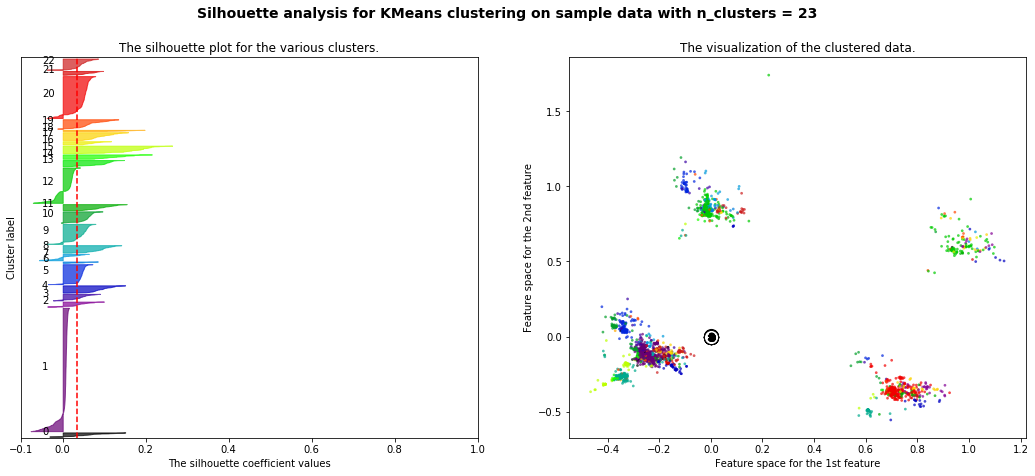

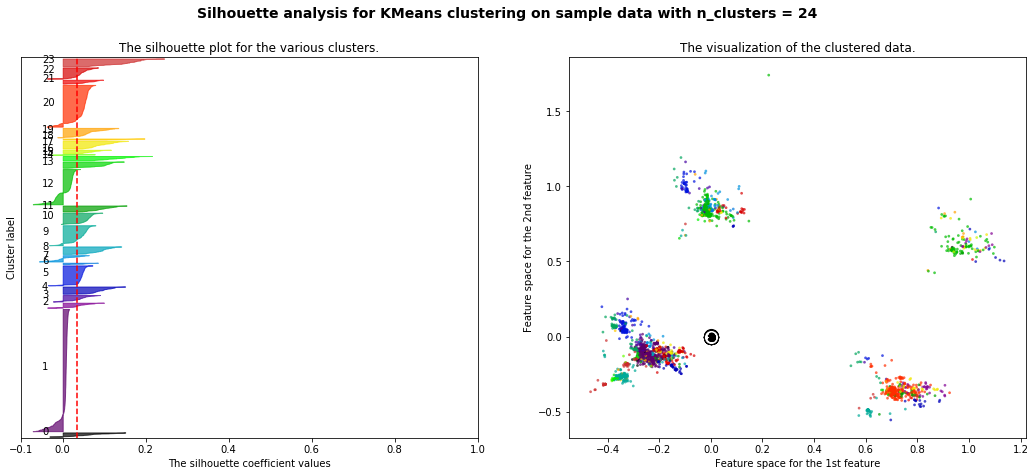

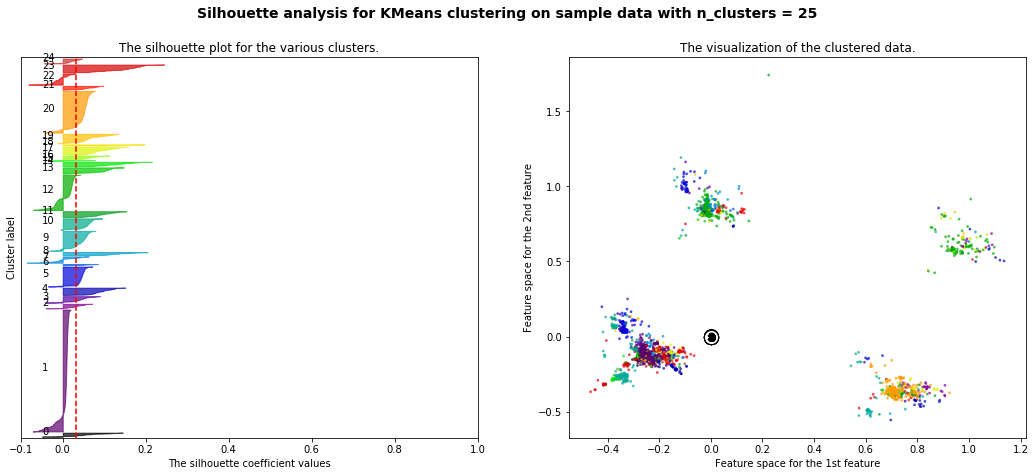

{18: 0.02731990829018572,
 19: 0.0331064589142711,
 20: 0.03378826554735443,
 21: 0.03608641305451806,
 22: 0.034080188327737765,
 23: 0.03547257940386737,
 24: 0.03528505310796431,
 25: 0.03321064569762207}

In [238]:
modeler = Modeler()
modeler.vectorize_keywords()


For n_clusters = 2 The average silhouette_score is : 0.03689099736784562
For n_clusters = 3 The average silhouette_score is : 0.032492948722960116
For n_clusters = 4 The average silhouette_score is : 0.032662115221410874
For n_clusters = 5 The average silhouette_score is : 0.028396642385097242
For n_clusters = 6 The average silhouette_score is : 0.02871833157313167
For n_clusters = 7 The average silhouette_score is : 0.03249448780721758
For n_clusters = 8 The average silhouette_score is : 0.03403527250409486
For n_clusters = 9 The average silhouette_score is : 0.03463857807736555
For n_clusters = 10 The average silhouette_score is : 0.0362219581105889
For n_clusters = 11 The average silhouette_score is : 0.030340789456452393
For n_clusters = 12 The average silhouette_score is : 0.028343490530322063
For n_clusters = 13 The average silhouette_score is : 0.03175342823494088
For n_clusters = 14 The average silhouette_score is : 0.03135995980792878
For n_clusters = 15 The average silhouette

/Users/brad/Documents/Scripts/flatiron/gndnews/topic_modeler/modeling.py:173: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1, ax2) = plt.subplots(1, 2)


For n_clusters = 22 The average silhouette_score is : 0.034080188327737765


/Users/brad/Documents/Scripts/flatiron/gndnews/topic_modeler/modeling.py:173: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1, ax2) = plt.subplots(1, 2)


For n_clusters = 23 The average silhouette_score is : 0.03547257940386737


/Users/brad/Documents/Scripts/flatiron/gndnews/topic_modeler/modeling.py:173: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1, ax2) = plt.subplots(1, 2)


For n_clusters = 24 The average silhouette_score is : 0.03528505310796431


/Users/brad/Documents/Scripts/flatiron/gndnews/topic_modeler/modeling.py:173: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1, ax2) = plt.subplots(1, 2)


For n_clusters = 25 The average silhouette_score is : 0.03321064569762207


/Users/brad/Documents/Scripts/flatiron/gndnews/topic_modeler/modeling.py:173: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1, ax2) = plt.subplots(1, 2)


For n_clusters = 26 The average silhouette_score is : 0.03302414690828357


/Users/brad/Documents/Scripts/flatiron/gndnews/topic_modeler/modeling.py:173: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1, ax2) = plt.subplots(1, 2)


For n_clusters = 27 The average silhouette_score is : 0.03280568934724872


/Users/brad/Documents/Scripts/flatiron/gndnews/topic_modeler/modeling.py:173: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1, ax2) = plt.subplots(1, 2)


For n_clusters = 28 The average silhouette_score is : 0.0334218570471731


/Users/brad/Documents/Scripts/flatiron/gndnews/topic_modeler/modeling.py:173: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1, ax2) = plt.subplots(1, 2)


For n_clusters = 29 The average silhouette_score is : 0.020656229196234395


/Users/brad/Documents/Scripts/flatiron/gndnews/topic_modeler/modeling.py:173: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1, ax2) = plt.subplots(1, 2)


For n_clusters = 30 The average silhouette_score is : 0.030381273544751133


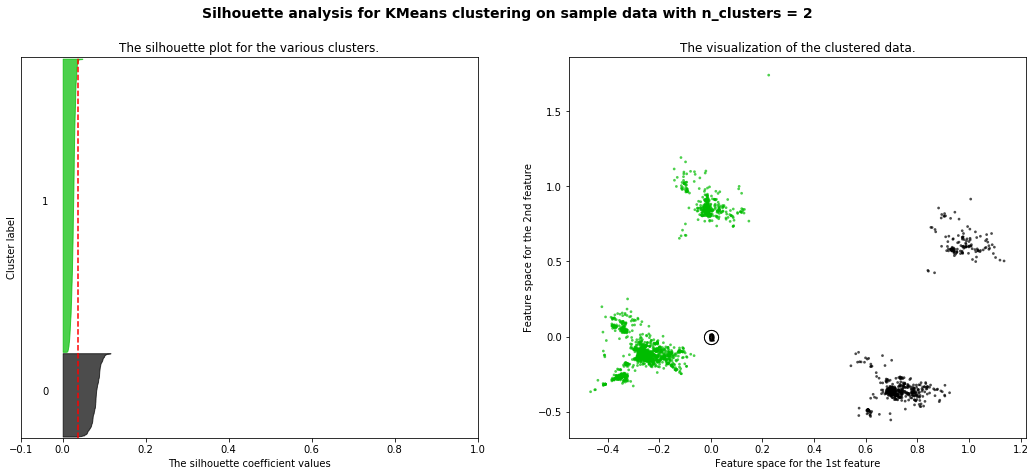

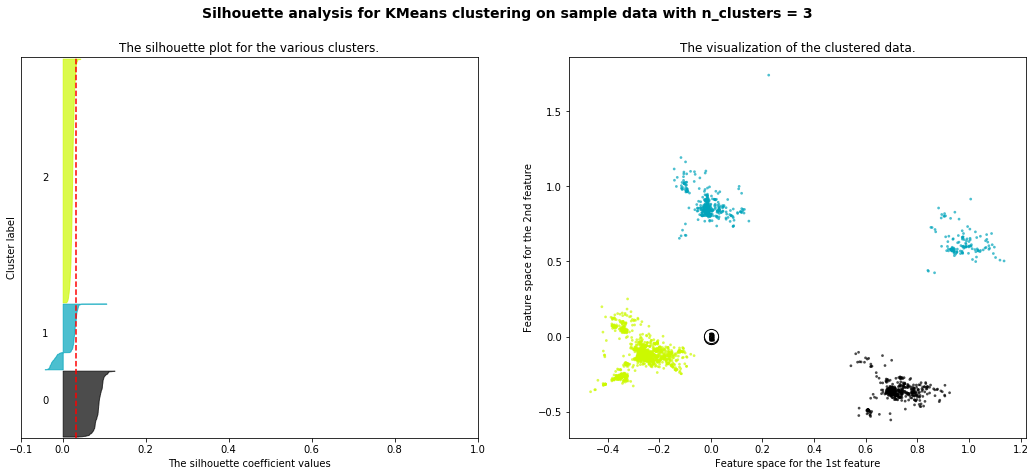

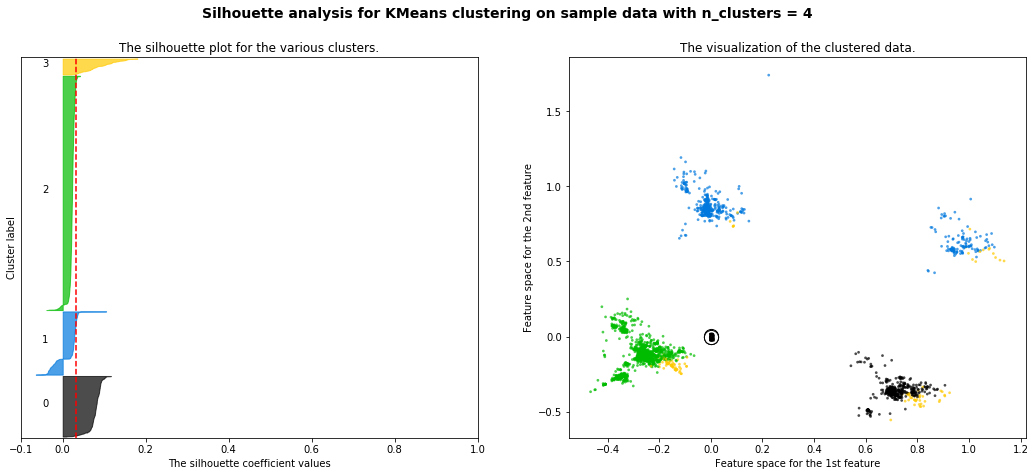

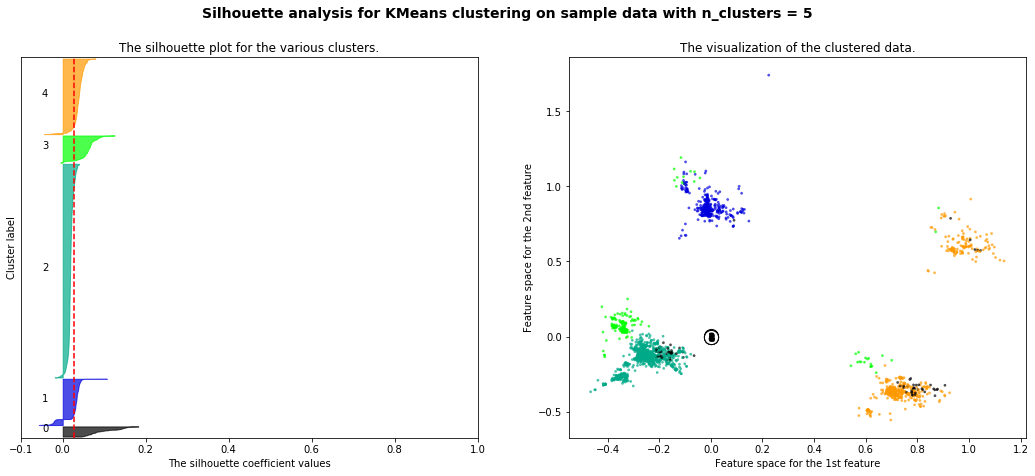

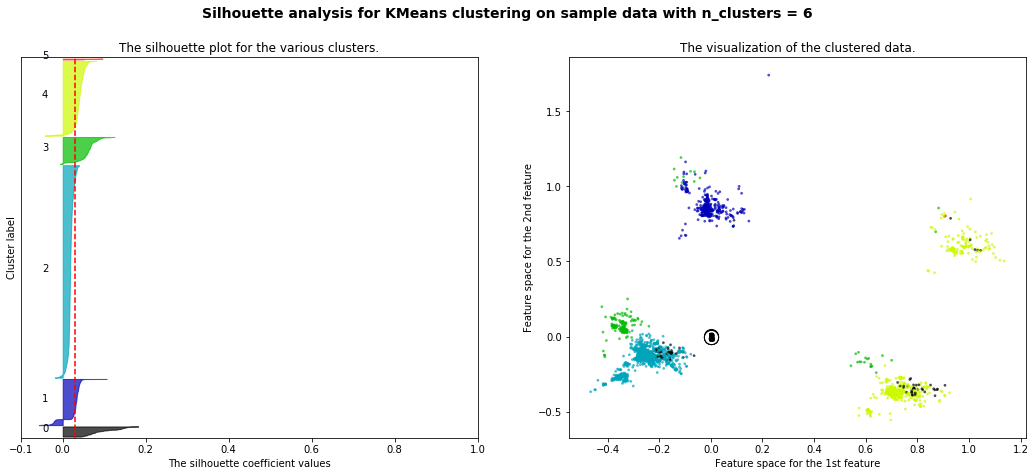

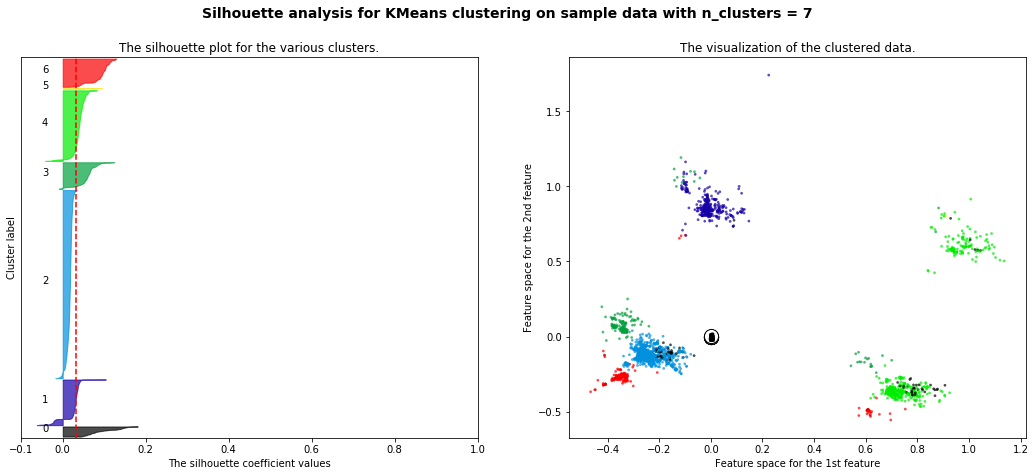

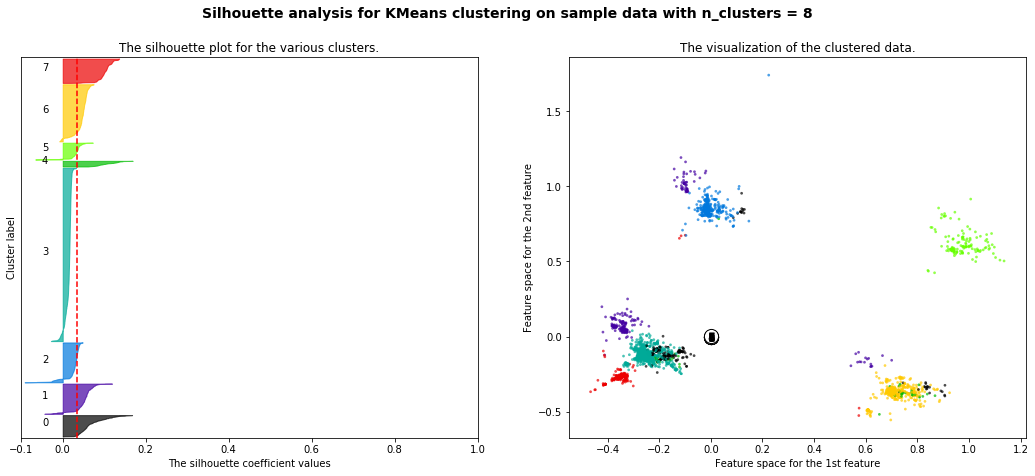

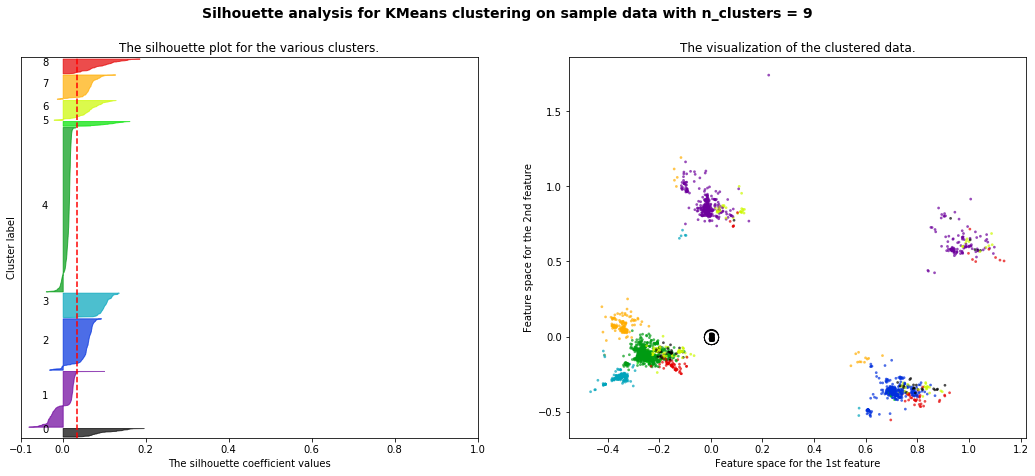

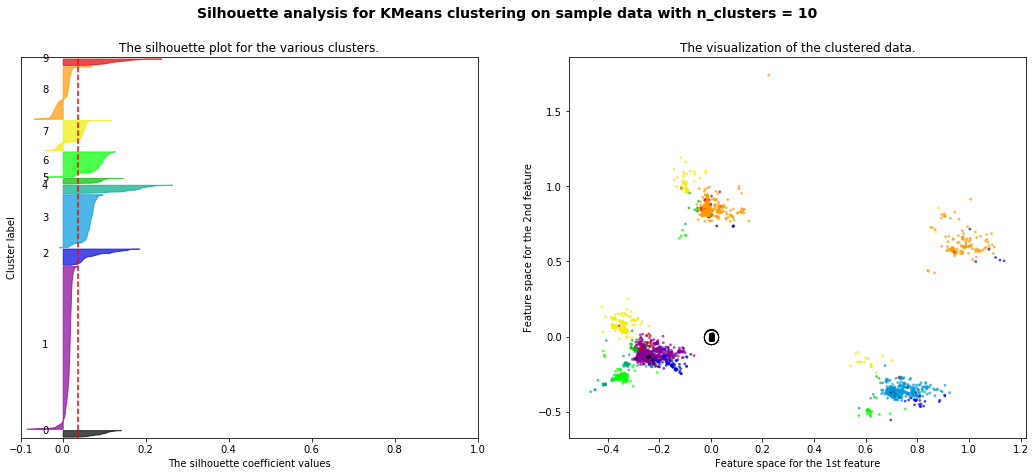

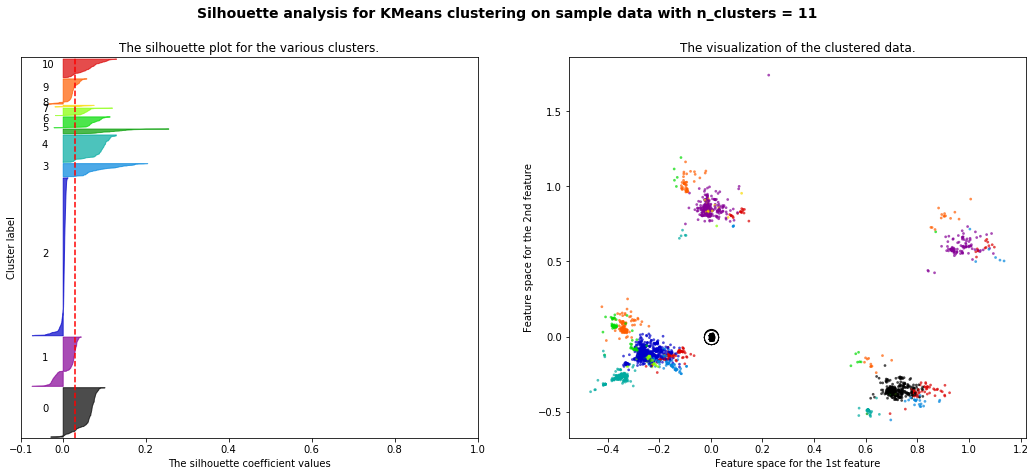

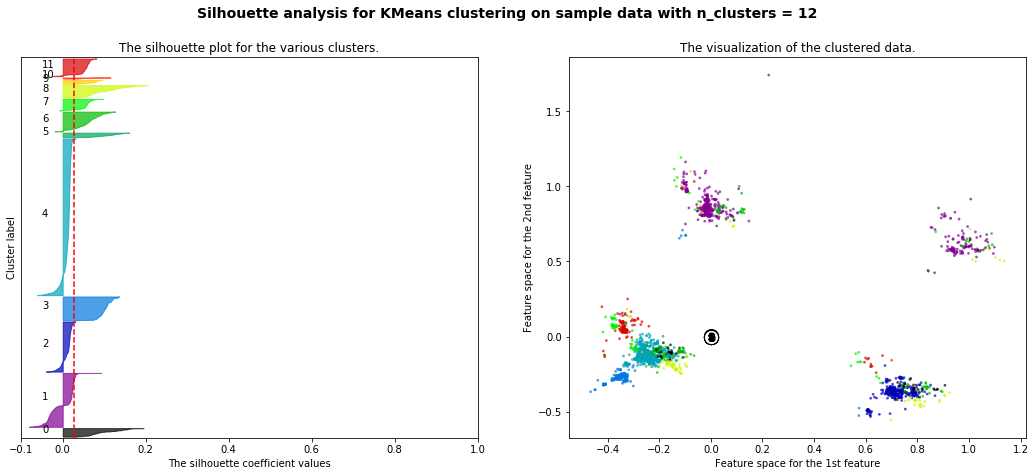

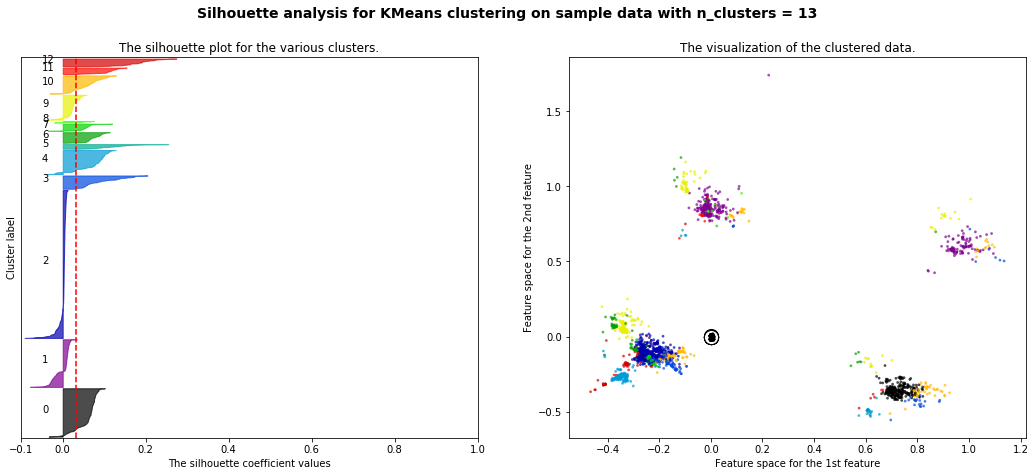

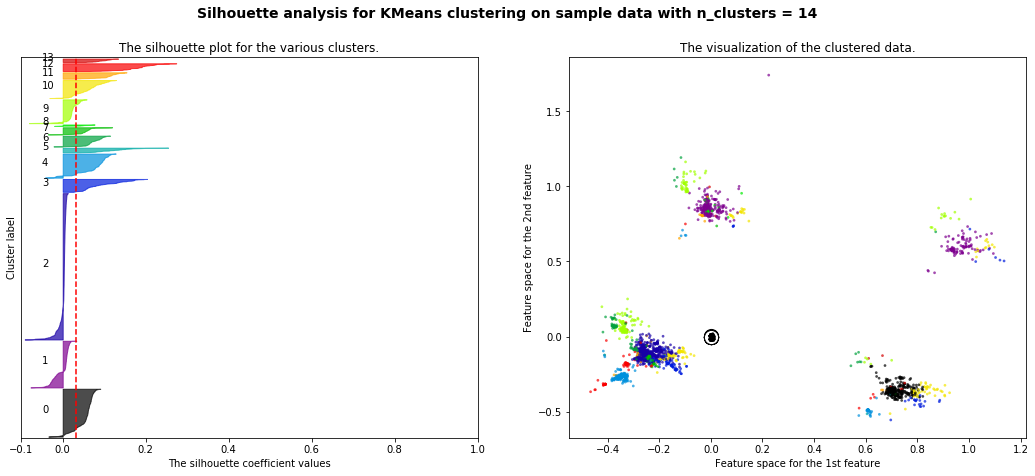

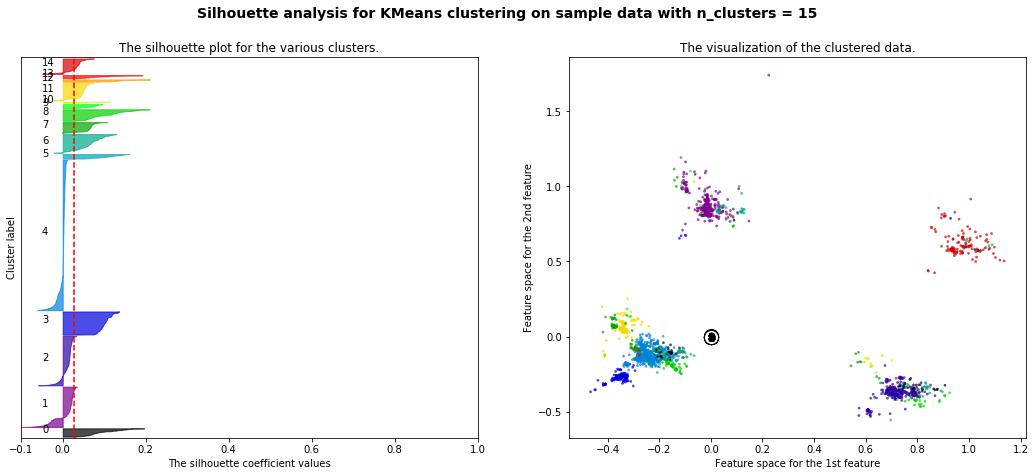

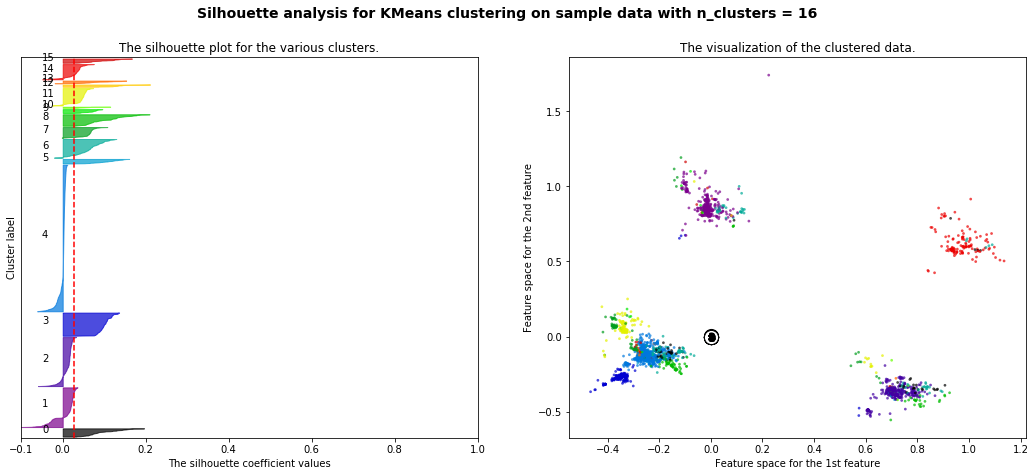

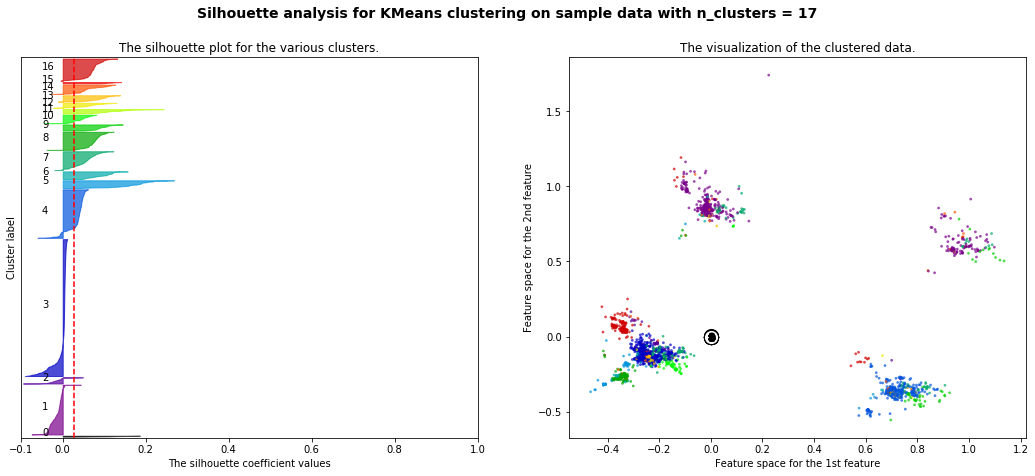

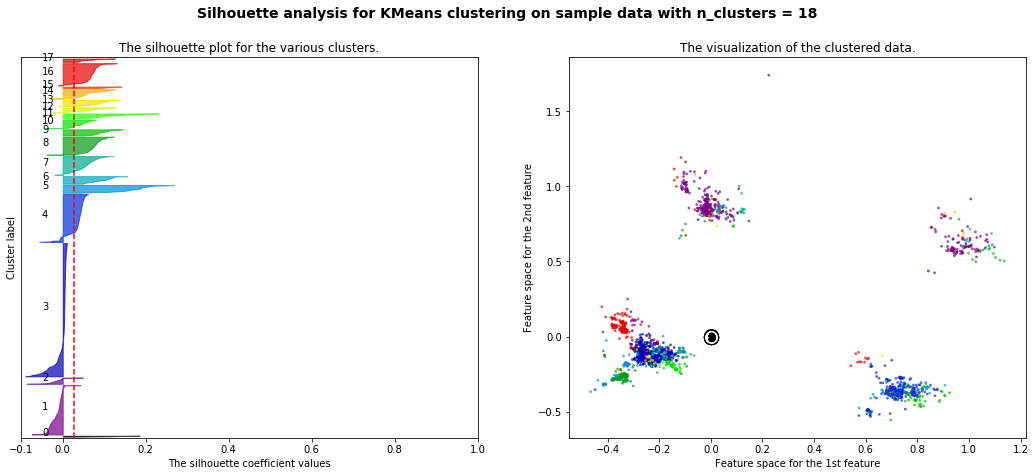

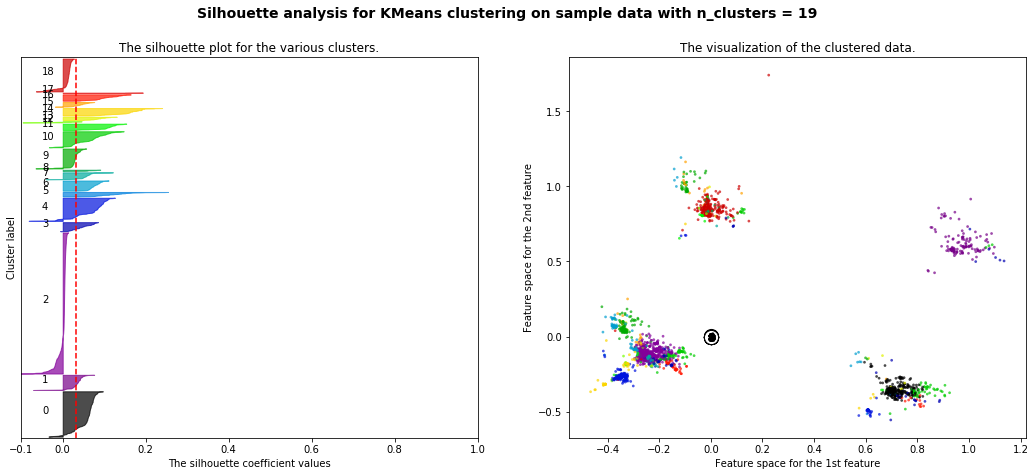

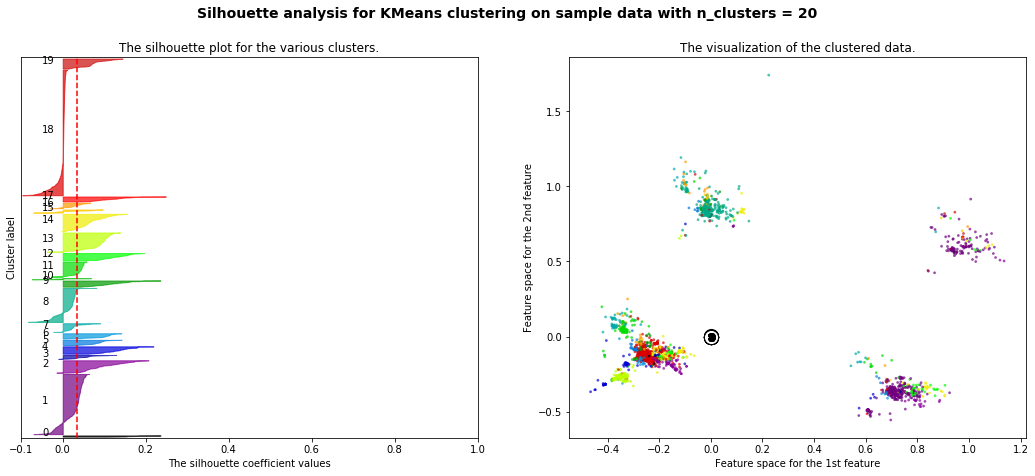

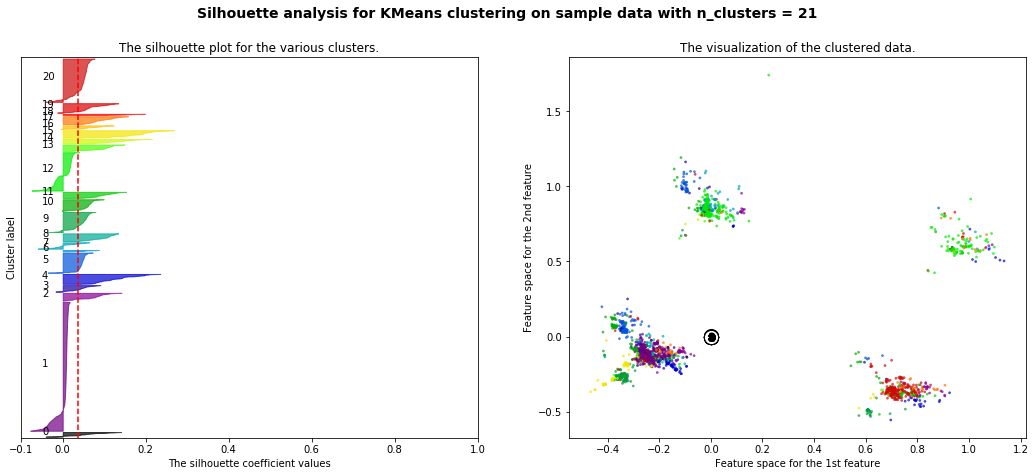

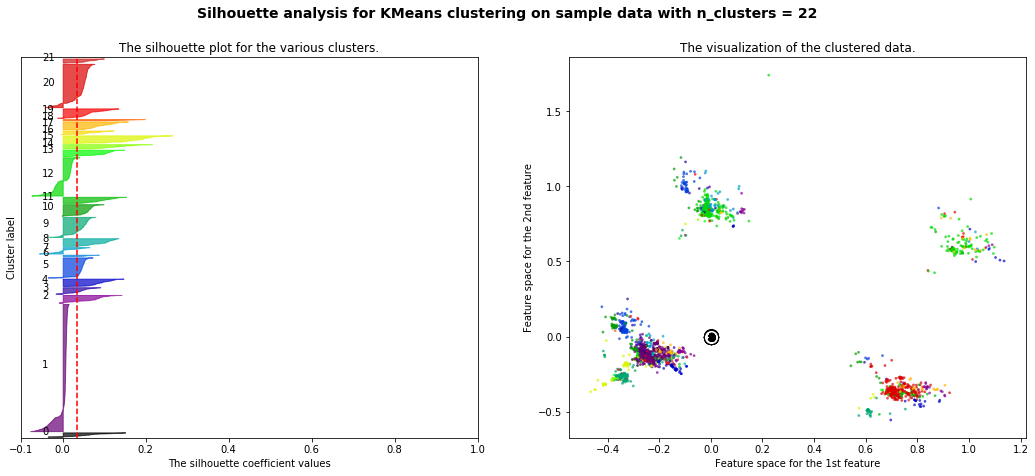

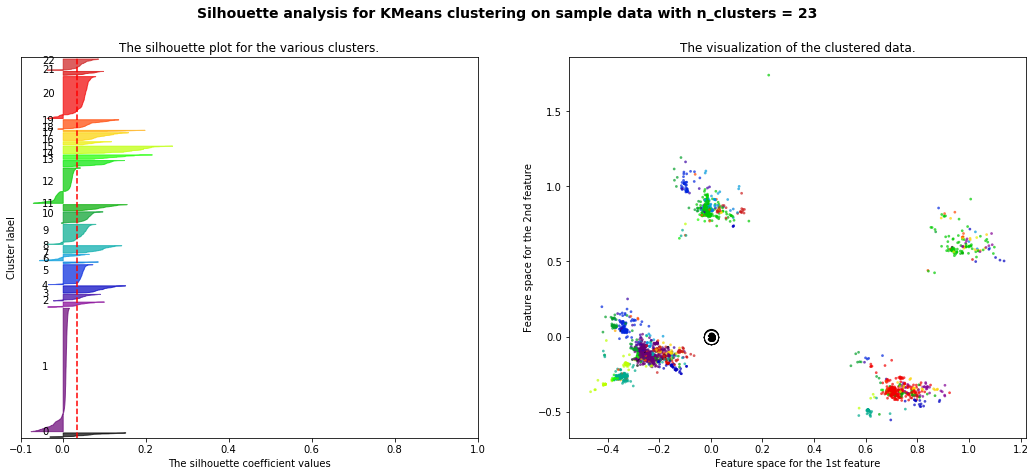

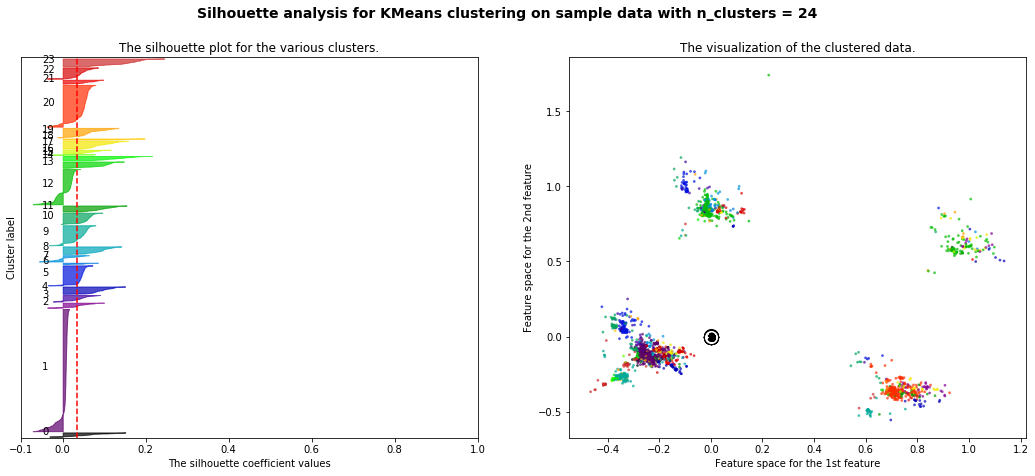

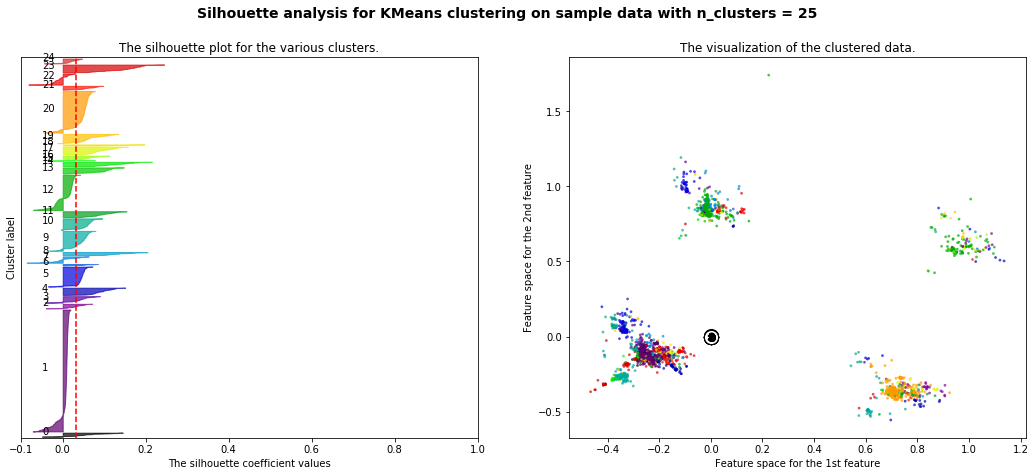

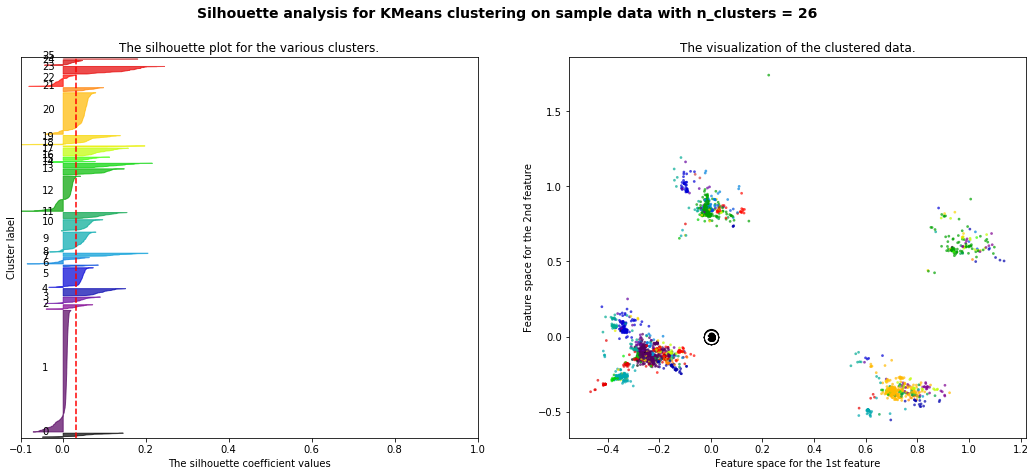

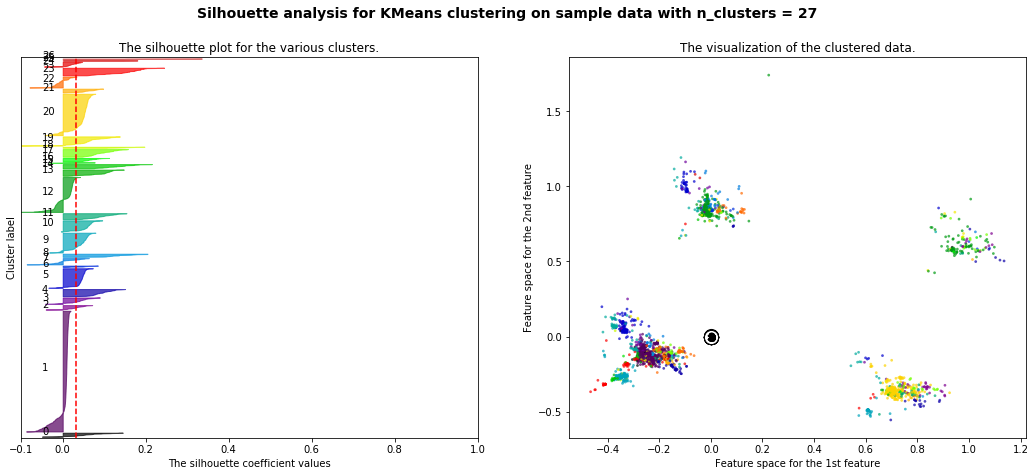

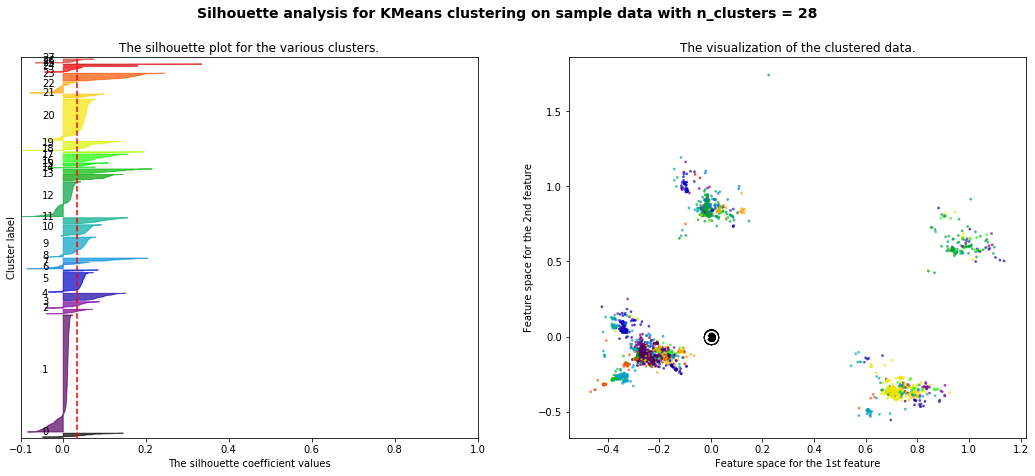

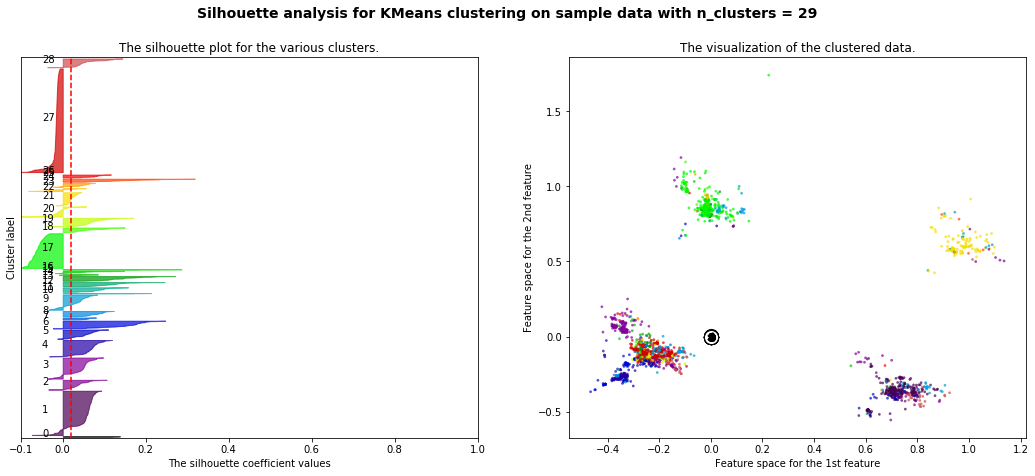

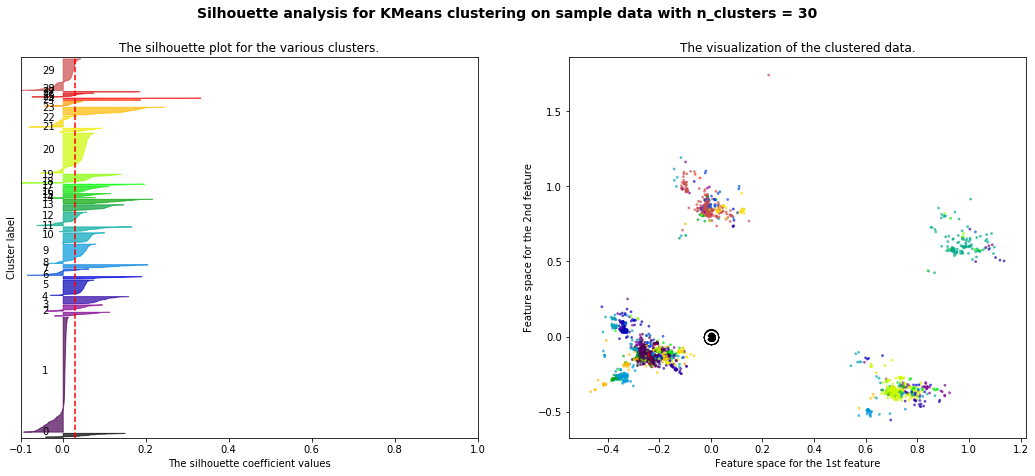

In [239]:
sil_avg = modeler.silhouette_analysis(2, 30)

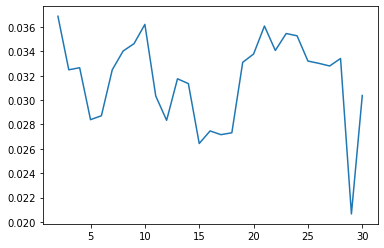

In [244]:
plt.plot(list(sil_avg.keys()), list(sil_avg.values()))

We have peak average silhouette scores at 10 clusters and 21 clusters. 10 is probably the best but let's take a look at 21 more closely.

In [245]:
modeler.cluster_keywords(21)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=21, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [247]:
pd.set_option('display.max_columns', 21)
modeler.display_keyword_clusters()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,National Parks 6,natural disasters 45,science 221,Hurricane Maria 46,floods 10,EPA 64,conservation 150,climate 42,Coal 16,climate change 51,ice on thin ice 45,climate change 220,weather 94,Flint Water Crisis 30,antarctica 25,Environmental Justice 111,wildfires 57,wildlife 7,climate policy 27,arctic 44,Climate Change 55
1,Conservation 6,Natural Disasters 11,Science 84,Puerto Rico 41,sea level rise 4,Scott Pruitt 23,Conservation 45,weather is happening 21,coal 15,climate 51,climate change 21,Climate Change 149,climate 35,Environmental Justice 22,Antarctica 17,environmental justice 18,wildfire season is year round now 39,poaching 5,oceans 25,climate change 25,Science 51
2,conservation 5,earth sciences 8,biology 25,Environmental Justice 20,Weather 3,Environmental Justice 18,wildlife 42,hurricane season 8,Navajo Generating Station 8,weather 18,Antarctica 15,climate policy 19,Weather 27,Lead 19,science 16,Air Pollution 12,California 27,conservation 5,Air Pollution 24,ice on thin ice 11,science 50
3,art 3,science 8,conservation 23,puerto rico 19,hurricane season 3,epa 18,animals 26,typhoons 8,Navajo Nation 7,science 13,antarctica 15,Environmental Justice 19,science 24,Flint water crisis 8,climate change 10,Bayou Bridge Pipeline 10,california 22,africa 4,wildlife 23,Arctic 8,climate change 43
4,climate change 2,volcanoes 8,ecology 20,hurricane maria 18,Floods 3,Epa 13,ecology 17,wild weather 7,fossil fuels 7,wildfires 8,glaciers 13,Trump Administration 14,weather is happening 22,Michigan 8,earth sciences 7,Keystone XL 8,Wildfires 22,rhino 4,green new deal 23,arctic sea ice 8,global warming 13
5,photography 2,kilauea 7,geology 19,FEMA 6,natural disasters 2,Trump Administration 12,climate change 13,hurricanes 7,Hopi Tribe 6,Climate Change 7,glaciology 9,green new deal 12,wild weather 16,Flint water contamination 5,larsen c ice shelf 5,Indigenous Rights 8,camp fire 14,vaquita 2,Oil and Gas 22,permafrost 7,Environment 12
6,national parks 2,climate change 7,marine biology 15,natural disasters 5,irony is dead 1,Environmental Protection Agency 11,invasive species 12,flooding 6,renewable energy 4,Climate 7,west antarctic ice sheet 8,renewable energy 11,hurricane season 13,Flint Michigan 5,Science 5,Oil and Gas 8,California wildfires 14,flamingo 1,renewable energy 22,they call it global warming for a reason 7,wildfires 8
7,National Park Service 2,wildfires 5,birds 14,hurricane season 5,arizona 1,Air Pollution 11,science 11,midwest 4,climate change 3,California 3,greenland 8,climate science 10,meteorology 9,Water 4,icebergs 5,Goddamn Pollution 8,climate change 13,african wildlife 1,biodiversity 22,greenland 7,Global Warming 8
8,nature with an early entry for the song of sum...,Hurricane Harvey 4,birdmodo 13,Climate Change 4,nitrogen 1,scott pruitt 11,ryan zinke 9,rapid intensification 3,Energy 3,environment 3,sea level rise 7,sea level rise 10,Meteorology 8,Flint Mich. 4,larsen c 4,Standing Rock 7,Climate Change 6,fishing 1,fossil fuels 20,meltdowns 6,Conservation 8
9,Art 1,lava 4,pollution 10,Natural Disasters 4,midwest floods 1,Science 11,environment 9,drought 3,Coal Ash 3,sea ice 3,climate 6,California 9,Science 6,News 4,Climate Change 4,Louisiana 7,Camp Fire 5,photography 1,pollution 19,sea ice 6,environment 5


With 21 clusters, we get the topics:
* national parks
* natural disasters 
* biology & conservation
* hurricanes and FEMA
* sea level rise and flooding
* EPA
* conservation / department of Interior
* hurricanes and tornadoes
* coal
* climate science
* polar ice
* climate politics
* extreme weather
* Flint water crisis
* Antarctica
* pipeline activism
* wildfires
* poaching
* climate policy
* Arctic
* climate science - bio

In [261]:
modeler.cluster_keywords(10)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [262]:
modeler.display_keyword_clusters()

,0,1,2,3,4,5,6,7,8,9
0,conservation 185,oceans 38,wildfires 41,climate change 359,Air Pollution 57,Environmental Justice 140,Hurricane Maria 45,natural disasters 52,weather 105,science 213
1,Conservation 69,marine biology 15,climate policy 30,Climate Change 223,Environmental Justice 16,Flint Water Crisis 22,Puerto Rico 41,Natural Disasters 12,climate 98,Science 83
2,wildlife 48,Oceans 11,wildfire season is year round now 30,science 65,EPA 11,environmental justice 21,puerto rico 19,climate change 9,weather is happening 38,biology 25
3,science 44,plastic pollution 7,EPA 28,Science 52,air pollution 9,Lead 17,hurricane maria 18,science 9,Weather 27,geology 20
4,animals 25,conservation 6,California 28,climate 40,Science 9,EPA 14,Environmental Justice 18,earth sciences 8,climate change 24,ecology 16
5,ecology 23,plastic 4,weather is happening 28,wildfires 32,Goddamn Pollution 7,Trump Administration 11,FEMA 6,volcanoes 8,wild weather 22,birdmodo 13
6,climate change 20,sometimes earth is just hella pretty 4,california 27,ice on thin ice 30,India 6,Bayou Bridge Pipeline 10,hurricane season 5,kilauea 7,hurricane season 20,birds 12
7,Environment 19,science 4,they call it global warming for a reason 26,arctic 24,Particulate Matter 4,Keystone XL 8,natural disasters 5,wildfires 6,science 16,weather 10
8,Science 17,animals 3,ice on thin ice 25,global warming 23,Health 4,Oil and Gas 8,Natural Disasters 4,Climate Change 6,wildfires 10,earth science 9
9,environment 15,Conservation 3,Trump Administration 25,Environmental Justice 22,California 3,Indigenous Rights 8,Climate Change 4,weather 5,hurricanes 10,nasa 8


In [292]:
modeler = Modeler()
modeler.vectorize_keywords(gizmodo='ignore', vectorizer='tfidf')
modeler.cluster_keywords(10)
modeler.display_keyword_clusters()

,0,1,2,3,4,5,6,7,8,9
0,climate 134,EPA 69,Environmental Justice 152,wildfires 42,Hurricane Maria 48,ice on thin ice 63,science 258,Oil and Gas 31,volcanoes 29,climate change 275
1,weather 83,Scott Pruitt 25,environmental justice 27,wildfire season is year round now 35,Puerto Rico 42,climate change 38,conservation 176,oil and gas 18,kilauea 23,Climate Change 171
2,climate change 52,epa 18,Flint Water Crisis 26,california 34,puerto rico 20,antarctica 25,Science 107,Environmental Justice 8,Volcanoes 19,Science 36
3,weather is happening 40,Environmental Justice 17,Climate Change 25,climate policy 29,Environmental Justice 20,Antarctica 23,Conservation 66,OIL AND GAS 8,natural disasters 15,wildfires 34
4,science 33,Science 15,Lead 21,California 28,hurricane maria 19,glaciers 15,wildlife 58,ryan zinke 7,science 15,science 31
5,wild weather 25,Climate Change 15,Air Pollution 12,weather is happening 27,natural disasters 6,arctic 12,ecology 40,Trump Administration 7,earth sciences 13,climate policy 19
6,hurricane season 23,Environmental Protection Agency 14,Bayou Bridge Pipeline 9,they call it global warming for a reason 26,FEMA 6,science 11,animals 39,Pipelines 7,geology 7,California 18
7,Weather 14,Epa 14,Trump Administration 8,oceans 26,hurricane season 6,glaciology 11,biology 34,Keystone XL 7,lava 5,arctic 17
8,wildfires 13,scott pruitt 13,Goddamn Pollution 8,Air Pollution 25,Hurricane Irma 5,greenland 11,climate change 28,fracking 5,hawaii 4,global warming 17
9,hurricanes 9,Trump Administration 12,Indigenous Rights 8,renewable energy 25,Natural Disasters 5,west antarctic ice sheet 10,marine biology 23,arctic national wildlife refuge 5,volcanic eruptions 4,sea level rise 16


For n_clusters = 28 The average silhouette_score is : 0.023531340884768142
For n_clusters = 29 The average silhouette_score is : 0.02417104924942425
For n_clusters = 30 The average silhouette_score is : 0.024995549192856487
For n_clusters = 31 The average silhouette_score is : 0.024614931426733447
For n_clusters = 32 The average silhouette_score is : 0.02477900897721632


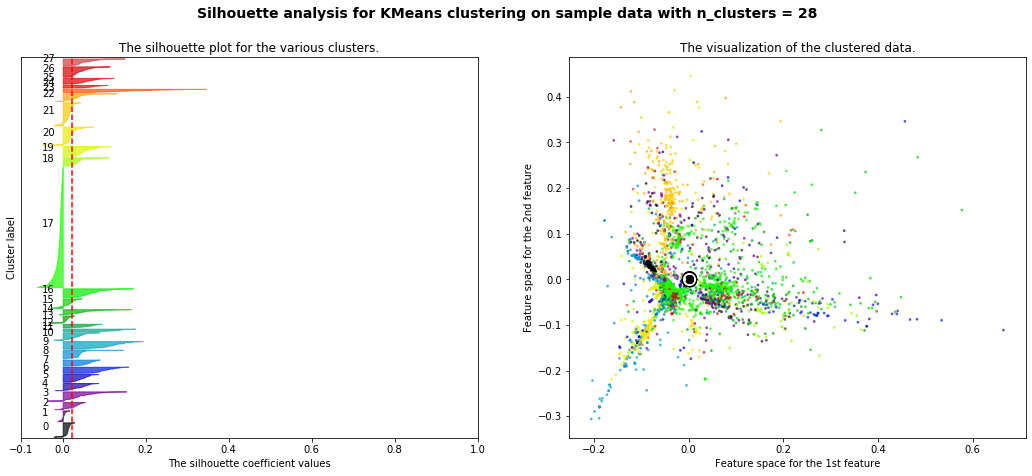

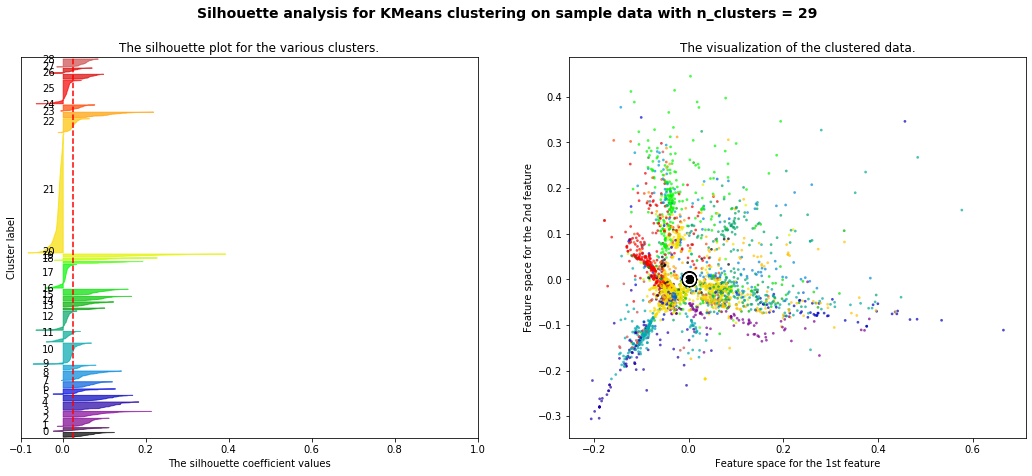

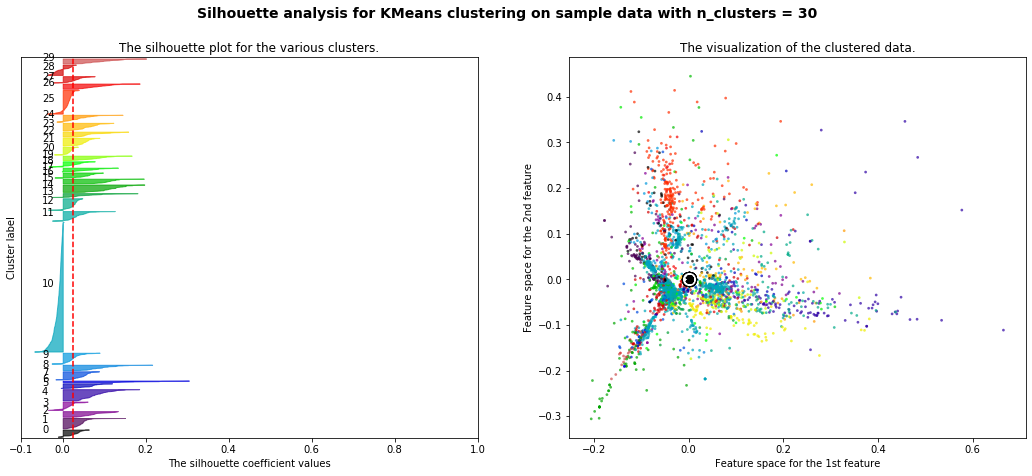

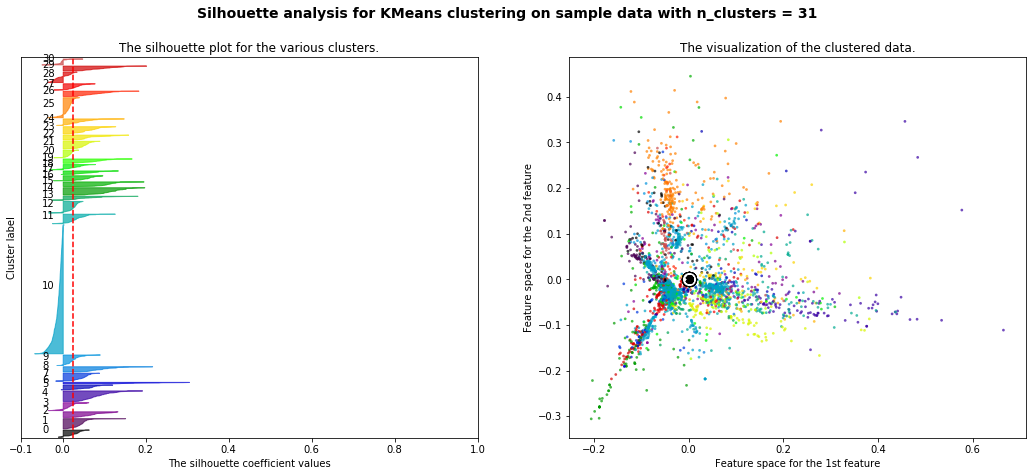

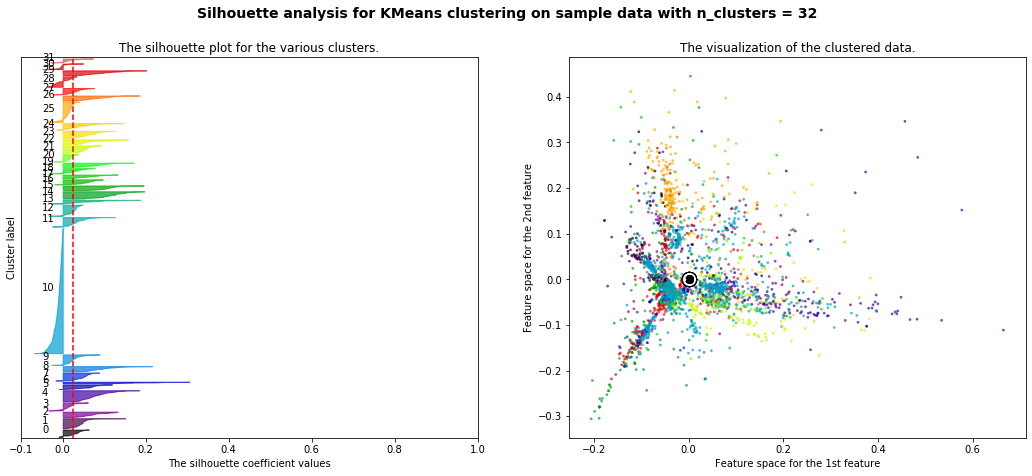

In [299]:
sil_avg = modeler.silhouette_analysis(28, 32)

In [300]:
sil_avg

{28: 0.023531340884768142,
 29: 0.02417104924942425,
 30: 0.024995549192856487,
 31: 0.024614931426733447,
 32: 0.02477900897721632}

## Using 30 clusters

In [6]:
modeler.vectorize_keywords(gizmodo='ignore', vectorizer='tfidf');

In [7]:
modeler.cluster_keywords(30, random_state=42)
modeler.display_keyword_clusters()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,science 156,recycling 13,Hurricane Maria 50,Environmental Justice 105,Air Pollution 57,weather 86,ice ice maybe 11,arctic 39,energy 23,conservation 113,australia 24,climate change 128,the kids are alright 20,renewable energy 43,hurricane season 26,volcanoes 27,California 48,wildlife 78,ice on thin ice 50,Trump Administration 47,climate talks 8,wildfires 48,Flint Water Crisis 31,Alaska 19,weather is happening 48,florida 14,car policy 8,Oil and Gas 27,green new deal 29,climate politics 13
1,biology 29,Environment 8,Puerto Rico 41,EPA 45,Environmental Justice 16,climate 84,meltdowns 7,climate change 23,geoengineering 17,Conservation 48,Australia 17,Climate Change 90,climate strike 17,climate change 14,natural disasters 23,kilauea 23,california 26,conservation 46,climate change 31,trump administration 29,cop24 7,wildfire season is year round now 46,Environmental Justice 24,ANWR 19,they call it global warming for a reason 22,Florida 10,donald trump 5,oil and gas 15,2020 election 21,Canada 7
2,Science 26,recycle 7,Environmental Justice 21,Climate Change 31,EPA 11,climate change 31,Ice Ice Maybe 7,ice on thin ice 12,climate change 11,marine biology 33,climate change 9,Science 74,greta thunberg 15,Renewable Energy 8,Natural Disasters 10,Volcanoes 18,wildfires 19,Wildlife 15,antarctica 31,climate change 16,Poland 3,climate change 24,Lead 23,arctic national wildlife refuge 12,heat wave 19,Hurricane Michael 8,epa 5,Keystone XL 7,Green New Deal 14,canada 6
3,climate change 22,trash 7,puerto rico 20,Scott Pruitt 25,Science 10,science 30,arctic 6,permafrost 7,technology 10,science 30,bushfires 8,science 60,Greta Thunberg 11,climate policy 7,floods 10,natural disasters 15,Climate Change 17,science 10,Antarctica 29,Climate Change 10,cop25 3,Wildfires 14,Michigan 9,alaska 11,climate change 15,hurricane michael 8,environment & climate 4,Pipelines 7,alexandria ocasio-cortez 13,trans mountain pipeline 5
4,geology 15,Climate Change 7,hurricane maria 17,environmental justice 18,air pollution 10,Weather 26,greenland 6,Arctic 6,clean energy 8,ecology 17,bush fires 8,ecology 25,climate change 9,solar power 6,hurricanes 10,earth sciences 15,Wildfires 15,animals 10,glaciers 15,Environmental Justice 10,international negotiations 3,california 13,Flint water crisis 8,Gwich'in 5,climate 15,hurricane season 6,environment 3,ryan zinke 7,climate policy 13,green new deal 4
5,birds 14,environment 6,natural disasters 6,scott pruitt 13,Goddamn Pollution 7,wild weather 22,glaciers 4,meltdowns 5,Energy 7,oceans 16,wildfire season is year round now 6,global warming 24,activism 8,clean energy 6,weather 8,science 13,climate change 11,ecology 9,science 13,EPA 9,COP24 2,California wildfires 12,Water 5,Climate Change 5,weather 12,storm surge 5,climate change 3,OIL AND GAS 7,climate change 12,2020 election 4
6,birdmodo 13,Recycling 6,FEMA 6,Science 12,India 6,weather is happening 10,ICE ICE MAYBE 4,arctic sea ice 5,solar geoengineering 7,animals 14,climate emergency 5,sea level rise 22,Youth 8,wind power 5,weather is happening 8,geology 6,camp fire 8,climate change 7,glaciology 11,climate policy 9,climate change 2,camp fire 10,Flint water contamination 5,climate change 4,snow 8,red tide 4,fiat chrysler 3,Environmental Justice 6,Climate Change 11,Trans Mountain Pipeline 4
7,environment 13,garbage 4,Natural Disasters 5,Environment 12,Particulate Matter 4,meteorology 9,they call it global warming for a reason 3,greenland 5,Technology 5,climate change 13,heat wave 4,fossil fuels 18,Climate Strike 7,science 4,climate change 6,lava 5,California wildfires 6,Conservation 6,climate 10,border wall 5,United Nations 2,weather 8,Flint Michigan 5,conservation 4,Heat Wave 8,Climate Change 4,Infrastructure 3,Trump Administration 6,2020 Election 10,Environmental Justice 3
8,animals 12,emergency 4,Hurricane Irma 5,epa 12,Climate Change 4,hurricane season 9,arctic sea ice 3,sea ice 5,carbon capture 5,biodivers

In [8]:
cluster_names = ['biology', 'recycling', 'Puerto Rico hurricanes', 'environmental justice', 'air pollution', 
                 'weather', 'ice', 'Arctic', 'geoengineering', 'conservation','Australia fires', 'general climate',
                'Greta Thunberg', 'renewable energy', 'hurricanes', 'volcanoes', 'California fires', 'wildlife',
                'Antarctica', 'Trump administration', 'international climate talks', 'wildfires', 'Flint water crisis',
                'ANWR', 'extreme weather', 'Florida', 'car policy', 'oil and gas', 'Green New Deal/2020 politics', 'US-Canada politics']

In [9]:
modeler.articles.cluster.value_counts().sort_index()

0     232
1      63
2      68
3     178
4      69
5     146
6      24
7      45
8      52
9     182
10     43
11    891
12     46
13     52
14     74
15     51
16     75
17     94
18     80
19     76
20     15
21     70
22     43
23     42
24     84
25     33
26     43
27     49
28     70
29     25
Name: cluster, dtype: int64

30 clusters gives good specific categories. Only 11 is outsized, and does seem to be the default general category. Using tfidf and random_state=42.

Save the cluster values back to MongoDB

In [328]:
modeler.save_clusters_to_mongodb()

## Multinomial logistic regression

https://scikit-learn.org/stable/auto_examples/linear_model/plot_sparse_logistic_regression_20newsgroups.html

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


#### Vectorize article


In [11]:
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import TfidfVectorizer


In [12]:
stopwords_list = stopwords.words('english') + list(string.punctuation) + ["''", '""', '...', '``','’','“','”']

In [13]:
articleVectorizer = TfidfVectorizer(stop_words=stopwords_list)

In [14]:
X = articleVectorizer.fit_transform(modeler.articles.body_text)
y = modeler.articles.cluster

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=42,
                                                    stratify=y,
                                                    test_size=0.2)

In [346]:
train_samples, n_features = X_train.shape
n_classes = np.unique(y).shape[0]

print('Dataset earther articles, train_samples=%i, n_features=%i, n_classes=%i'
      % (train_samples, n_features, n_classes))

Dataset earther articles, train_samples=2412, n_features=44560, n_classes=30


In [347]:

lr = LogisticRegression(solver='saga',
                        multi_class='multinomial',
                        penalty='l1',
                        random_state=42,
                        max_iter=1000,
                        )
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy = np.sum(y_pred == y_test) / y_test.shape[0]
density = np.mean(lr.coef_ != 0, axis=1) * 100
print('Test accuracy: %.4f' % (accuracy))
print('%% non-zero coefficients per class:\n %s' % (density))

Test accuracy: 0.5091
% non-zero coefficients per class:
 [0.03366248 0.00897666 0.00224417 0.02244165 0.00897666 0.02692998
 0.01346499 0.0067325  0.01122083 0.03815081 0.0067325  0.07405745
 0.0067325  0.01346499 0.01795332 0.01570916 0.01570916 0.01795332
 0.01346499 0.01795332 0.00448833 0.00897666 0.0067325  0.01122083
 0.01795332 0.0067325  0.0067325  0.01570916 0.02019749 0.0067325 ]


In [348]:
X_train[0]

<1x44560 sparse matrix of type '<class 'numpy.float64'>'
	with 297 stored elements in Compressed Sparse Row format>

How does l2 penalty fare?

In [350]:
lr = LogisticRegression(
                        multi_class='multinomial',
                        penalty='l2',
                        random_state=42,
                        max_iter=1000,
                        )
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy = np.sum(y_pred == y_test) / y_test.shape[0]
density = np.mean(lr.coef_ != 0, axis=1) * 100
print('Test accuracy: %.4f' % (accuracy))
print('%% non-zero coefficients per class:\n %s' % (density))

Test accuracy: 0.4677
% non-zero coefficients per class:
 [91.18716338 91.18716338 91.18716338 91.18716338 91.18716338 91.18716338
 91.18716338 91.18716338 91.18716338 91.18716338 91.18716338 91.18716338
 91.18716338 91.18716338 91.18716338 91.18716338 91.18716338 91.18716338
 91.18716338 91.18716338 91.18716338 91.18716338 91.18716338 91.18716338
 91.18716338 91.18716338 91.18716338 91.18716338 91.18716338 91.18716338]


### Check some results

In [404]:
dict(zip(list(modeler.articles.iloc[:10].title),
         [cluster_names[x] for x in lr.predict(X[:10])],
    ))

{"The World's Largest Floating Wind Farm Is Here": 'renewable energy',
 "Trump's 'Tremendous' Superfund Work Includes Not Funding Cleanup": 'environmental justice',
 'How to Help Those Affected By the Australian Wildfires': 'Australia fires',
 'Smoke From Australia’s Horrific Wildfires, as Seen From Space': 'general climate',
 "Earthquake Shows Puerto Rico's Electric Grid Is Still Fragile": 'Puerto Rico hurricanes',
 "It's Time To Let Go Of Commuter Culture": 'general climate',
 "Australia's Bushfires Show There Is No Safe Global Warming": 'general climate',
 'Amazon Threatens to Fire Employees Who Spoke Out on Climate Change': 'general climate',
 'Trump Starts 2020 With a New Bid to Ignore Climate Change': 'general climate',
 "Geoengineering Isn't Enough to Stop Greenland From Melting": 'general climate'}

What we're seeing is that the specific categorizations are good but a lot are getting dumped into the catch-all. What if we look at the prediction probabilities?

In [408]:
{k: v for k, v in sorted({ cluster_names[i] : x for i, x in enumerate(lr.predict_proba(X[3])[0]) }.items(), key=lambda item: item[1], reverse=True)}

{'general climate': 0.14131795394395233,
 'Australia fires': 0.12735401405700397,
 'biology': 0.0930110551726239,
 'weather': 0.07393332906811309,
 'wildfires': 0.05888360268897745,
 'California fires': 0.0461020993107768,
 'conservation': 0.045170602424077014,
 'extreme weather': 0.03667958627886435,
 'wildlife': 0.03564822918588581,
 'environmental justice': 0.03478126583176016,
 'hurricanes': 0.027206814087220185,
 'recycling': 0.02482363287851275,
 'air pollution': 0.020638504448192704,
 'Antarctica': 0.019506358049526554,
 'Trump administration': 0.017558025583443566,
 'Green New Deal/2020 politics': 0.01677861119358528,
 'volcanoes': 0.016653208489124202,
 'ANWR': 0.016224828359066752,
 'car policy': 0.016095255823880716,
 'Arctic': 0.016051558866937703,
 'Puerto Rico hurricanes': 0.014335456245332633,
 'geoengineering': 0.014097654037262453,
 'Florida': 0.013916298969916873,
 'oil and gas': 0.01347750143362154,
 'renewable energy': 0.01282185903302978,
 'Greta Thunberg': 0.01144

### Look at top few topic predictions

In [21]:
def top_cluster_predictions(idx, num=2):
    sorted_probs = {k: v for k, v in 
                    sorted({ cluster_names[i] : x for i, x in enumerate(lr.predict_proba(X[idx])[0]) }.items(), 
                           key=lambda item: item[1], 
                           reverse=True)}
    return list(sorted_probs)[:num]

In [424]:
print(modeler.articles.iloc[8].title)
top_cluster_predictions(8, 3)

Trump Starts 2020 With a New Bid to Ignore Climate Change


['general climate', 'environmental justice', 'Trump administration']

In [22]:
def top_topics(idx, num=3):
    print(modeler.articles.iloc[idx].title)
    print(top_cluster_predictions(idx, num))

In [437]:
top_topics(1034)

Australia Continues to Fry Under Scorching Heat Waves
['Australia fires', 'general climate', 'weather']


Top topics seems to be doing pretty well. The "general climate" catch-all is pretty much a wasted topic.

### Using SMOTE 

We appear to have the problem that the logistic regression is extremely slow on SMOTE data for some reason. We should maybe trying random under-sampling instead.

In [16]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train) 


Using TensorFlow backend.


In [17]:
lr = LogisticRegression(solver='saga',
                        multi_class='multinomial',
                        penalty='l1',
                        random_state=42,
                        max_iter=1000,
                        )
lr.fit(X_train_resampled, y_train_resampled)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='multinomial', n_jobs=None, penalty='l1',
                   random_state=42, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
import numpy as np
y_pred = lr.predict(X_test)
accuracy = np.sum(y_pred == y_test) / y_test.shape[0]
density = np.mean(lr.coef_ != 0, axis=1) * 100
print('Test accuracy: %.4f' % (accuracy))
print('%% non-zero coefficients per class:\n %s' % (density))

Test accuracy: 0.5240
% non-zero coefficients per class:
 [0.18850987 0.13240575 0.02244165 0.1929982  0.07181329 0.21543986
 0.04937163 0.06732496 0.10098743 0.24685817 0.0516158  0.15260323
 0.03366248 0.07405745 0.10996409 0.02692998 0.09425494 0.1548474
 0.03815081 0.14362657 0.02468582 0.08078995 0.01122083 0.04712747
 0.10771993 0.02917415 0.08303411 0.07181329 0.05834829 0.06508079]


In [49]:
top_topics(21)

Scientists Want to Spray Particles in the Sky to Cool Earth
['general climate', 'volcanoes', 'biology']


In [51]:
cluster_names[modeler.articles.iloc[21].cluster]

'geoengineering'

Model took FOREVER, like 30 minutes or so, to run but is better. Let's save it.

In [52]:
from joblib import dump, load
dump(lr, 'smoted_logreg.joblib')

['smoted_logreg.joblib']